In [1]:
## Catálogo das Abordagens
#  A1: Cadastro
#  A2: Medidas
#      A2.1: Medidas Importantes
#      A2.2: Select KBeast
#  A3: Estatística
#  A4: Doenças
#      A4.1: Select KBest
#  A5: Doenças sem Hipotensão e Normotenso
#  A6: Escolho Doença
#  A7: Categorias
#  A8: Extratificação Sexo Masculino
#  A9: Extratificação Sexo Feminino
#  A10: Sistólicas
#  A11: Diastólicas
#  A12: Medidas Mais Importantes

In [2]:
import time
inicio = time.time()
inicio

1679670160.9265575

In [3]:
#contar os itens de uma lista
from collections import Counter
from IPython.display import Image

#visualizar graficos
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import numpy as np
#bibliotecas pandas de leitura de arquivos
import pandas as pd
import scipy
from pathlib import Path
#caracter 
import re

#separar treino, teste, validação
from sklearn.model_selection import train_test_split
# métricas de avaliação do K-Means
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
# Método Silhouette
from sklearn.metrics import silhouette_samples, silhouette_score
#biblioteca do kmeans
from sklearn.cluster import KMeans
#avaliar classificacao cluster
#from sklearn.metrics.cluster import adjusted_rand_score

from sklearn import svm
# AIX - Explanability
import lime
from lime import lime_tabular

from sklearn.ensemble import RandomForestClassifier

#from sklearn_extra.cluster import KMedoids

##############################

import openpyxl
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_curve, precision_recall_curve
from imblearn.over_sampling import RandomOverSampler
import copy

from mpl_toolkits.axes_grid1 import make_axes_locatable
#import mlxtend
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
#from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from joblib import dump, load
np.random.seed(8)
pd.set_option('display.max_rows', 500)


from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
import sklearn.metrics as metrics

In [4]:
# Definição de diretórios e Disco de leitura dos arquivos (Desktop ou Notebook) 
config_dirs = open("prefixo_dados.txt").readlines() 
DIR_PREFIXO = Path(config_dirs[0].strip())


DIR_DATASET = DIR_PREFIXO / "PA_clean" / "dataset"
DIR_KMEANS = DIR_PREFIXO / "PA_clean" / "kfold" / "KMeansRandom"


In [5]:
#leitura do dataset completo com dados cadastrais, medidas e estatísticas

dataset_apos_tratamento = pd.read_csv(DIR_DATASET / "dados_tratados" / "pacientes_completos_tratados.csv",sep=';', encoding="Latin1")

#dataset = dataset.drop ("Unnamed: 0", axis=1)
#for i in dataset.columns:
#    print(repr(i))
#

In [6]:
dataset_apos_tratamento.loc[:,'Hipotensao':].head()

,Hipotensao,Sistolica Isolada,Diastolica Isolada,Dipping,Non Dipping,Extreme Dipping,Reverse Dipping,Morning Surge,Masked,Whitecoat,...,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica,Diferença % Dipping
0,1,0,0,0,0,0,1,0,0,0,...,61.0,9545.5,4902.0,3748.0,841.5,16.58,10.99,15,39,0.966
1,1,0,0,0,0,0,1,0,0,0,...,62.0,8586.5,5034.5,2915.0,606.0,7.38,6.89,9,23,0.969
2,1,0,0,0,1,0,0,0,0,1,...,80.0,10674.0,6154.0,3721.0,751.5,12.48,13.02,19,20,1.056
3,1,0,0,1,0,0,0,0,0,1,...,80.5,10679.5,6420.5,3642.0,602.5,16.14,10.58,23,11,1.107
4,1,0,0,1,0,0,0,0,0,0,...,77.0,9141.5,6118.0,2405.0,566.0,11.88,12.65,14,15,1.137


In [7]:
#!pip install scikit-learn-extra

In [8]:
############################### FUNÇÕES ##########################################

#Funções para inicializar o valor de K para entregar ao método k-means.fit

# sum_of_squares_medidas = calculate_wcss(dados_medidas_sem_id)
# num_otimo_clusters_medidas = optimal_number_of_clusters(sum_of_squares_medidas)

def calculate_wcss(data):
    """
    Inicialização do valor de k:
    A partir de X que recebe o dataset recortado de cada abordagem. 
    Varia o valor inicial de k de 2 a 20 vezes e, em cada uma dessas iterações calcula 
    a soma dos quadrados das distâncias das amostras em relação ao centroide (intra-clusters).
    Guarda esses 20 valores de distância na lista wcss que será entregue à função 'optimal_number_of_clusters'
    
    Parametros
    ----------
    data : DataFrame
        conjunto de dados para fazer o `.fit()` do KMeans

    Returns
    -------
    wcss : lista contendo os valores calculados das distâncias da soma de quadrados intra-cluster
    """
    
    from sklearn.cluster import KMeans
    wcss = []
    for n in range(2, 21):
        #     iniciando com o mínimo de 2 clusters
        kmeans = KMeans(n_clusters=n, random_state=42)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

def optimal_number_of_clusters(wcss):
    """
    Objetivo: Identificar qual o valor de k que tenha a maior distância 
    entre os pontos calculadas pela somas dos quadrados iterando com a lista wcss 
    calculada com a função `calculate_wcss()`
    
    Parametros
    ----------
    wcss : lista contendo os valores de soma de quadrados intra-cluster

    
    Returns
    -------
    int : número de clusters 
    """
    from math import sqrt
    # começa com x1 = 2 porque foi designado assim. y1 é o 1o. elemento da lista wcss
    # x2 = 20 porque foi designado assim, y2 é o último elemento da lista wcss
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]

        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    return distances.index(max(distances)) + 2

In [9]:
dataset_apos_tratamento['IMC']

0        33.2
1        29.4
2        25.8
3        24.2
4        40.6
         ... 
19145    27.5
19146    26.9
19147    33.3
19148    25.0
19149    30.9
Name: IMC, Length: 19150, dtype: float64

##  Tratar campos para Categorias

In [10]:
# Cálculo do Indice de Massa Corporal:
#         IMC entre 18,0 e 24,9 Kg/m2: normal
#         IMC menor do que 18,0 Kg/m2: baixo peso
#         IMC entre 25,0 e 29,9 Kg/m2: sobrepeso 
#         IMC entre 30,0 e 34,9 Kg/m2: obesidade grau I 
#         IMC entre 35,0 e 39,9 Kg/m2: obesidade grau II 
#         IMC maior do que 40,0 Kg/m2: obesidade grau III  

def faixas_imc(imc):

    classes = ["Peso normal","Sobrepeso", "Obesidade"]
    intervalos = [(0, 25),(25, 30),(30, 1000)]
#    classes = ["Baixo Peso","Normal","Sobrepeso","Obesidade grau I","Obesidade grau II","Obesidade Grau III"]
#    intervalos = [(0, 18),(18, 25),(25, 30),(30, 35),(35, 40),(40, 1000)]
    
    for faixa in range(len(classes)):
        if imc < intervalos[faixa][1]:
            return classes[faixa]

def faixas_imc_13(imc):
    classes = ["Peso normal", "Obesidade"]
    intervalos = [(0, 30),(30, 1000)]

    for faixa in range(len(classes)):
        if imc < intervalos[faixa][1]:
            return classes[faixa]
        

def faixas_imc_classe(imc):
    classes = [1, 2, 3]
    intervalos = [(0, 25),(25, 30),(30, 1000)]
#    classes = [1, 2, 3, 4, 5, 6]
#    intervalos = [(0, 18),(18, 25),(25, 30),(30, 35),(35, 40),(40, 1000)]
    
    for faixa in range(len(classes)):
        if imc < intervalos[faixa][1]:
            return classes[faixa]
    
def faixas_imc_classe_13(imc):
    classes = [1, 2]
    intervalos = [(0, 30),(30, 1000)]
    
    for faixa in range(len(classes)):
        if imc < intervalos[faixa][1]:
            return classes[faixa]
    
def faixas_etarias(idade):
    classes = ["Adultos","Meia-idade","Idoso"]
    intervalos = [(0, 50),(50, 65),(65, 200)]
#    classes = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]
#    intervalos = [(0, 20),(20, 45),(45, 60),(60, 75),(75, 90),(90, 200)]
    
    for faixa in range(len(classes)):
        if idade <= intervalos[faixa][1]:
            return classes[faixa]

        
def faixas_etarias_13(idade):
    classes = ["Adultos","Idoso"]
    intervalos = [(0, 65),(65, 200)]
 
    for faixa in range(len(classes)):
        if idade <= intervalos[faixa][1]:
            return classes[faixa]

        
        
def faixas_etarias_classe(idade):
    classes = [1, 2, 3]
    intervalos = [(0, 50),(50, 65),(65, 200)]    
#    classes = [1, 2, 3, 4, 5, 6]
#    intervalos = [(0, 20),(20, 45),(45, 60),(60, 75),(75, 90),(90, 200)]
    
    for faixa in range(len(classes)):
        if idade <= intervalos[faixa][1]:
            return classes[faixa]

        
def faixas_etarias_classe_13(idade):
    classes = [1, 2]
    intervalos = [(0, 65),(65, 200)]
      
    for faixa in range(len(classes)):
        if idade <= intervalos[faixa][1]:
            return classes[faixa]

In [11]:
#dataset_apos_tratamento['idade'] = dataset_apos_tratamento['idade'].fillna(-1)
#dataset_apos_tratamento = dataset_apos_tratamento[dataset_apos_tratamento['idade'] != -1]

In [12]:
#dataset_apos_tratamento = dataset_apos_tratamento[dataset_apos_tratamento['altura_normalizada'] <= 2.5]
#dataset_apos_tratamento = pd.concat([dataset_apos_tratamento.loc[:,'numero_identificacao':'altura'],
#                                     dataset_apos_tratamento['IMC'],
#                                    dataset_apos_tratamento.loc[:,'data_exame':'Picos Diastolica']],
#                                    axis=1)
#
#print(len(dataset_apos_tratamento))
## Dataset com IMC e tratamento de Nans com a política de normalização
#dataset_apos_tratamento.to_csv(DIR_BASE / "pacientes_completos_tratados.csv", 
#                        sep=";", encoding="latin1", index=False)
#
#dataset_apos_tratamento.to_csv(DIR_BASE / "pacientes_com_tab.csv", 
#                        sep="\t", encoding="latin1", index=False)

In [13]:
dataset_apos_tratamento.loc[:,'Hipotensao':'Normotenso']

,Hipotensao,Sistolica Isolada,Diastolica Isolada,Dipping,Non Dipping,Extreme Dipping,Reverse Dipping,Morning Surge,Masked,Whitecoat,Normotenso
0,1,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,1,0,0,0,0,1,0
3,1,0,0,1,0,0,0,0,0,1,0
4,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
19145,1,0,0,1,0,0,0,1,0,1,0
19146,1,0,0,0,1,0,0,0,0,1,0
19147,1,0,0,0,1,0,0,0,0,1,0
19148,1,0,0,0,0,1,0,0,0,0,0


In [14]:
def verdadeiro_falso(valor):
    if valor == True:
        return 1
    else:
        return 0

In [15]:
dataset_por_classes = pd.DataFrame()
dataset_por_classes['numero_identificacao'] = dataset_apos_tratamento['numero_identificacao']
dataset_por_classes['genero'] = dataset_apos_tratamento['genero']
dataset_por_classes['idade'] = dataset_apos_tratamento['idade'].apply(faixas_etarias_classe)
dataset_por_classes['IMC'] = dataset_apos_tratamento['IMC'].apply(faixas_imc_classe)
dataset_por_classes = pd.concat([dataset_por_classes, dataset_apos_tratamento.loc[:,'sist 9:00':'diast 8:45']],axis=1)
for doenca in list(dataset_apos_tratamento.loc[:,'Hipotensao':'Whitecoat'].columns):
    dataset_por_classes[doenca] = dataset_apos_tratamento[doenca].apply(verdadeiro_falso)
dataset_por_classes

,numero_identificacao,genero,idade,IMC,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,...,Hipotensao,Sistolica Isolada,Diastolica Isolada,Dipping,Non Dipping,Extreme Dipping,Reverse Dipping,Morning Surge,Masked,Whitecoat
0,4,1,3,3,105.0,108.0,116.0,104.0,106.0,98.0,...,1,0,0,0,0,0,1,0,0,0
1,5,1,3,2,103.0,114.0,82.0,104.0,98.0,106.0,...,1,0,0,0,0,0,1,0,0,0
2,6,1,1,2,147.0,148.0,156.0,140.0,130.0,132.0,...,1,0,0,0,1,0,0,0,0,1
3,7,0,1,1,140.0,139.0,142.0,137.0,135.0,177.0,...,1,0,0,1,0,0,0,0,0,1
4,8,1,1,3,113.0,110.0,101.0,108.0,111.0,111.0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19145,21786,1,1,2,163.0,198.0,172.0,148.0,161.0,156.0,...,1,0,0,1,0,0,0,1,0,1
19146,21787,1,1,2,114.0,120.0,164.0,116.0,119.0,126.0,...,1,0,0,0,1,0,0,0,0,1
19147,21788,0,1,3,107.0,110.0,103.0,105.0,108.0,111.0,...,1,0,0,0,1,0,0,0,0,1
19148,21792,0,3,2,94.0,107.0,112.0,124.0,120.0,94.0,...,1,0,0,0,0,1,0,0,0,0


In [16]:
dataset_apos_tratamento['IMC'].unique

<bound method Series.unique of 0        33.2
1        29.4
2        25.8
3        24.2
4        40.6
         ... 
19145    27.5
19146    26.9
19147    33.3
19148    25.0
19149    30.9
Name: IMC, Length: 19150, dtype: float64>

In [17]:
1 == True, 0 == False

(True, True)

In [18]:
dataset_apos_tratamento.loc[:,'Hipotensao':'Normotenso']

,Hipotensao,Sistolica Isolada,Diastolica Isolada,Dipping,Non Dipping,Extreme Dipping,Reverse Dipping,Morning Surge,Masked,Whitecoat,Normotenso
0,1,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,1,0,0,0,0,1,0
3,1,0,0,1,0,0,0,0,0,1,0
4,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
19145,1,0,0,1,0,0,0,1,0,1,0
19146,1,0,0,0,1,0,0,0,0,1,0
19147,1,0,0,0,1,0,0,0,0,1,0
19148,1,0,0,0,0,1,0,0,0,0,0


In [19]:
dataset_apos_tratamento['Hipotensao'].describe()

count    19150.00000
mean         0.90094
std          0.29875
min          0.00000
25%          1.00000
50%          1.00000
75%          1.00000
max          1.00000
Name: Hipotensao, dtype: float64

In [20]:
# Dataset com cadastro, IMC e medidas
dataset_cadastro = pd.concat([dataset_apos_tratamento['numero_identificacao'],
                             dataset_apos_tratamento['genero'],dataset_apos_tratamento['idade'],
                             dataset_apos_tratamento['IMC'],
                     dataset_apos_tratamento.loc[:,'sist 9:00':'diast 8:45']],axis=1)

# Dataset com as medidas
dataset_medidas = pd.concat([dataset_apos_tratamento['numero_identificacao'],
                     dataset_apos_tratamento.loc[:,'sist 9:00':'diast 8:45']],axis=1)

# Dataset com numero identificação e estatísticas
dataset_estatistica = pd.concat([dataset_apos_tratamento['numero_identificacao'],
                     dataset_apos_tratamento.loc[:,'Media Sistolica em 24h':'DP Diastolica em 24h']],axis=1)

# Dataset com numero identificação e doenças
dataset_doenca = pd.concat([dataset_apos_tratamento['numero_identificacao'],
                     dataset_apos_tratamento.loc[:,'Hipotensao':'Normotenso']],axis=1)

# Dataset separado por masculino
dataset_masc = dataset_apos_tratamento[dataset_apos_tratamento['genero'] == 1]

dataset_masc_medidas =  pd.concat([dataset_masc['numero_identificacao'],
                     dataset_masc.loc[:,'sist 9:00':'diast 8:45']],axis=1)

# Dataset separado por feminino
dataset_fem = dataset_apos_tratamento[dataset_apos_tratamento['genero'] == 0]

dataset_fem_medidas =  pd.concat([dataset_fem['numero_identificacao'],
                     dataset_fem.loc[:,'sist 9:00':'diast 8:45']],axis=1)

In [21]:
print(f'Quantidade F: {len(dataset_fem_medidas)}\nQuantidade M: {len(dataset_masc_medidas)}')

Quantidade F: 10446
Quantidade M: 8704


In [22]:
def gera_arquivos_por_grupo(todos_dados_grupo, abordagem):
    grupos = list(set(todos_dados_grupo['grupo'].values))
    
    todos_dados_grupo.to_csv(DIR_KMEANS / "approaches_output"/ f"KMEANS_approach_{abordagem}_todos_pacientes.csv", 
                        sep=";", encoding="latin1", index=False)
    
    for grupo in grupos:
        df_grupo = todos_dados_grupo[todos_dados_grupo['grupo'] == grupo]
        df_grupo.to_csv(DIR_KMEANS / "approaches_output" / f"KMEANS_approach_{abordagem}_grupo_{grupo}.csv", 
                        sep=";", encoding="latin1", index=False)

    true_false_1_0 = {True:1, False:0}
    for doenca in list(todos_dados_grupo.loc[:,'Hipotensao':'Normotenso'].columns):
        todos_dados_grupo.loc[:,doenca] = todos_dados_grupo.loc[:,doenca].replace(true_false_1_0)
    
    todos_dados_grupo.to_csv(DIR_KMEANS / "approaches_output" / f"KMEANS_approach_{abordagem}_compara_todos_pacientes.csv", 
                        sep=";", encoding="latin1", index=False)
    if (abordagem == 'medidas'):
        try:
            df_grupo123 = todos_dados_grupo[(todos_dados_grupo['grupo'] == 1) | (todos_dados_grupo['grupo'] == 2) | (todos_dados_grupo['grupo'] == 3)]
            df_grupo123.to_csv(DIR_KMEANS / "approaches_output" / f"KMEANS_approach_{abordagem}_grupo123.csv", 
                            sep=";", encoding="latin1", index=False)

            df_grupo45 = todos_dados_grupo[(todos_dados_grupo['grupo'] == 4) | (todos_dados_grupo['grupo'] == 5)]
            df_grupo45.to_csv(DIR_KMEANS / "approaches_output" / f"KMEANS_approach_{abordagem}_grupo45.csv", 
                            sep=";", encoding="latin1", index=False)

            df_grupo67 = todos_dados_grupo[(todos_dados_grupo['grupo'] == 6) | (todos_dados_grupo['grupo'] == 7)]
            df_grupo67.to_csv(DIR_KMEANS / "approaches_output" / f"KMEANS_approach_{abordagem}_grupo67.csv", 
                            sep=";", encoding="latin1", index=False)
        except:
            pass

## Função K-Means

In [23]:
#  Ao final, é calculado os centroides gerando uma matriz cujas colunas são os grupos e as linhas são as features
#
def aplica_kmeans(dados_sem_id, abordagem):
    inicio = time.time()
    dados_array = np.array(dados_sem_id)
    sum_of_squares = calculate_wcss(dados_array)
    num_otimo_clusters = optimal_number_of_clusters(sum_of_squares)
    print('\n\nNumero otimo de cluster - Abordagem {1}: {0}\n\n'.format(num_otimo_clusters, abordagem))
    
    #habilitando o kmeans com 8 grupos (foi calculado na etapa anterior)
    kmeans = KMeans(n_clusters=num_otimo_clusters, random_state=42).fit(dados_array)
    
    #listar os grupos 
    grupos = kmeans.fit_predict(dados_array) + 1
    
    #Centroides
    centros = kmeans.cluster_centers_
    dici = {}
    for cluster,centro in enumerate(centros):
        dici[f"c{cluster+1}"] = centro
    
    df_centroides = pd.DataFrame(dici)
    
    df_centroides.to_excel(DIR_KMEANS / "centroide" /  f'centroide_kmeans_{abordagem.lower().replace(" ","_")}.xlsx', 
                            index=False)
                           #encoding="latin1", index=False)
    
    fim = time.time()
    print(f'Tempo de execucao: {round(fim - inicio,3)} s\n\n')
    return grupos



## Cria sub-diretórios para armazenar gráficos e outputs

In [24]:
# Cria os novos sub-diretórios para aplicar o K-fold
def makedir(PATH):
    import os
    try:
        os.makedirs(PATH)
    except:
        pass

## Plota gráfico de Barras (Histograma) após grupos gerados pelo K-means

In [25]:
makedir('D:\\PA_clean\\kfold\\KMeansRandom\\graficos')

In [26]:
def grafico_barras_grupos(grupos,abordagem,caminho):
    classes = []
    qtds = []
    contagem = Counter(grupos)
    
    for i in range(1,len(set(grupos)) + 1):
        classes.append(i)
        qtds.append(contagem[i])

    plt.bar(classes,qtds,color="#a8ddb5")
    plt.xticks(classes)
    plt.ylabel('Patient Quantity')
    plt.xlabel('K-means Group')
    plt.title(f'Number of Patients x K-means Group in {abordagem} Approach')
    fig = plt.gcf()
    fig.savefig(caminho,format="svg")
    plt.show()
    return classes


In [27]:
def aplica_elbow(dados_sem_id,abordagem,caminho):
    inicio = time.time()
    dados_array = np.array(dados_sem_id)
    Sum_of_squared_distances = []
    
    eixo_x = list(range(1,20))
    
    for k in range(1,20):
        km = KMeans(n_clusters=k)
        km = km.fit(dados_cadastro_array)
        Sum_of_squared_distances.append(km.inertia_)
        
    plt.plot(eixo_x, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Soma das Distâncias ao Quadrado')
    plt.title(f'Metodo Elbow Para Otimizar k - {abordagem}')
    fig = plt.gcf() 
    fig.savefig( caminho, format="svg")
    plt.show()
    fim = time.time()
    print(f'Tempo de execucao: {round(fim - inicio,3)} s\n\n')

## Gráfico Silhouette para avaliar qualidade dos clusters

In [28]:
def aplica_silhouette(dados_sem_id,grupos,abordagem):
    inicio = time.time()
    dados_array = np.array(dados_sem_id)
    range_n_clusters = range(2,len(set(grupos)) + 1)
    for n_clusters in range_n_clusters:    
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        # O 1st subplot é o grafico silhouette
        # O coeficiente silhouette  um range de -1, 1 but in this example all
        # Os exemplos vão ficar em [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # O (n_clusters + 1) * 10 é para inserir um espaço em branco entre a silhueta
        # Para gerar destaque
        ax1.set_ylim([0, len(dados_array) + (n_clusters + 1) * 10])
        # Inicialize o clusterer com o valor n_clusters e um valor aleatorio
        # seed 10.
        clusterer = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = clusterer.fit_predict(dados_array)
    # O silhouette_score fornece o valor médio para todas as amostras.
        # Isso dá uma perspectiva sobre a densidade e separação das formas
        # clusters
        #  Cálculo de toda a matriz que entra no cálculo do Silhouette
        silhouette_avg = silhouette_score(dados_array, cluster_labels)
        print("Para n_clusters =", n_clusters,
              "O score_silhouette medio e :", silhouette_avg)
        # Calcule as pontuações da silhueta para cada amostra
        sample_silhouette_values = silhouette_samples(dados_array, cluster_labels)
        y_lower = 10
        for i in range(n_clusters):
            # Agregue as pontuações de silhueta para amostras pertencentes a
            # cluster i, e classifica-los
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color,       alpha=0.7)
            # Rotule os gráficos de silhueta com seus números de cluster no meio
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            # Calcule o novo y_lower para o próximo gráfico
            y_lower = y_upper + 10  #10 para as 0 amostras
        ax1.set_title("O grafico de silhueta para os varios clusters.")
        ax1.set_xlabel("O valor silhouette coefficient")
        ax1.set_ylabel("Cluster label")
        # A linha vertical para a pontuação média da silhueta de todos os valores
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])  # Limpar os yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        # 2º gráfico mostrando os clusters reais formados
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(dados_array[:, 0], dados_array[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
        # Labeling dos clusters
        centers = clusterer.cluster_centers_
        # Desenhe círculos brancos nos centros do cluster
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')
        ax2.set_title("A visualizacao dos dados agrupados.")
        ax2.set_xlabel("Eixo X X0")
        ax2.set_ylabel("Eixo Y X1")
        plt.suptitle((f"Analise de silhueta para agrupamento KMeans na Abordagem {abordagem}"
                      "com n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        fig = plt.gcf()
        fig.savefig( DIR_KMEANS / 'graficos' / f'metodo_silhouette_{abordagem.lower().replace(" " ,"_")}_{n_clusters}.svg',
                    format="svg")

    plt.show()
    fim = time.time()
    print(f'Tempo de execucao: {round(fim - inicio,3)} s\n\n')

In [29]:
def aplica_random_forest(dados_sem_id,grupos,abordagem,classes,num_kfold):
    dados_array = np.array(dados_sem_id)
    df = dados_sem_id.copy()
    
    df.insert(0,'grupo',grupos)
    random_forest = RandomForestClassifier(n_estimators=50)
    
    #train_ratio = 0.75
    #validation_ratio = 0.15
    #test_ratio = 0.10

    # separar train(75%) - 14.485, test (10%) - 7.726  and validation (15%) - 11.588
    #  O parâmetro random_state=42 garante o rastreio do numero de identificação
    # 
    #exp_train_x, exp_train_y, exp_valid_x, exp_valid_y = get_kfold(DATASET_NAME, exp_n)
    #model = RandomForestClassifier(random_state=42)
    
    build_datasets(df,abordagem,num_kfold)
    
    x_train, y_train, x_val, y_val = get_kfold(abordagem,0)
    #x_train, x_test, y_train, y_test = train_test_split(dados_array,grupos,test_size=1-train_ratio,random_state=42)
    #x_val, x_test, y_val, y_test = train_test_split(dados_array,grupos,test_size=test_ratio/(test_ratio + validation_ratio),random_state=42)
    
    #treino
    random_forest.fit(x_train, y_train)
    
    
    scores = cross_val_score(random_forest, X=dados_array, y=grupos, cv=num_kfold, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print("Accuracy: {} (+/- {})".format(scores.mean(), scores.std() * 2))
    print(f"Accuracy: {scores.mean():0.2f} (+/- {scores.std() * 2:0.2f})")
    
    #calcular acuracia, recall e f1
    y_prev_val = random_forest.predict(x_val)
    #y_prev_val = random_forest.predict(x_val)

    accuracy = np.round(accuracy_score(y_val, y_prev_val),2)
    recall = np.round(recall_score(y_val, y_prev_val,average='macro'),2)
    f1 = np.round(f1_score(y_val, y_prev_val,average='macro'),2)
    
    
    
    print("\n\n=================Validação==============\n\n")
    print(f'Accuracy: {accuracy:.2f} - Recall: {recall:.2f} - F1 Score: {f1:.2f}\n\n')
    
    #Matriz de Confusão Validação
    mat=list(metrics.confusion_matrix(y_val, y_prev_val, labels=classes))
    df_confusion_matrix_val = pd.DataFrame(mat,index = classes, columns = classes)
    
    print(df_confusion_matrix_val)
    
    for teste in range(1,num_kfold):
        #calcular acuracia, recall e f1
        x_test, y_test, x_valt, y_valt = get_kfold(abordagem,teste)
        y_prev_test = random_forest.predict(x_test)

        accuracy = np.round(accuracy_score(y_test, y_prev_test),2)
        recall = np.round(recall_score(y_test, y_prev_test,average='macro'),2)
        f1 = np.round(f1_score(y_test, y_prev_test,average='macro'),2)



        print(f"\n\n=================Teste{teste}==============\n\n")
        print(f'Accuracy: {accuracy:.2f} - Recall: {recall:.2f} - F1 Score: {f1:.2f}\n\n')

        #Matriz da Confusão Teste
        mat=list(metrics.confusion_matrix(y_test, y_prev_test, labels=classes))
        df_confusion_matrix_test = pd.DataFrame(mat,index = classes, columns = classes)

        print(df_confusion_matrix_test)
    
    

    ##validacao
    #pacientes_validacao_diast_sisto = x_val[['numero_identificacao']]
    #pacientes_validacao_diast_sisto['Grupo_Real'] = y_val_
    #pacientes_validacao_diast_sisto['Grupo_Previsto'] = y_prev_val
    #
    #pacientes_validacao_diast_sisto.to_csv(path_or_buf = DIR_KMEANS / "padrao_doenca" / f'pacientes_validacao_{abordagem.lower().replace(" " ,"_")}.csv', 
    #             sep=';',index=False,encoding='UTF-8')
    #
    ##teste
    #pacientes_teste_diast_sisto = x_test[['numero_identificacao']]
    #pacientes_teste_diast_sisto['Grupo_Real'] = y_test_
    #pacientes_teste_diast_sisto['Grupo_Previsto'] = y_prev_test
    #
    #pacientes_teste_diast_sisto.to_csv(path_or_buf = DIR_KMEANS / "padrao_doenca" / f'pacientes_teste_{abordagem.lower().replace(" " ,"_")}.csv', 
    #             sep=';',index=False,encoding='UTF-8')
    #
    #
    
        cabecalho = list(dados_sem_id.columns)
        #calculo da importancia de cada variavel para idenficar os grupos com 3 casas decimais
        importancia = pd.DataFrame({'features':cabecalho,'importance':np.round(random_forest.feature_importances_,3)})
        importancia = importancia.sort_values('importance',ascending=False)

        importancia.to_csv(path_or_buf = DIR_KMEANS / "padrao_doenca" / f'importancia_features_{abordagem.lower().replace(" " ,"_")}_test{teste}.csv', 
                     sep=';',index=False,encoding='UTF-8')

        print(f"\n\n=================Importancia Teste{teste}==============\n\n")
        print(importancia.head(10))
    return importancia

## Calcula a média da Sistólica e da Diastólica

In [30]:
df_media_sist_diast = pd.DataFrame()
df_media_sist_diast['Media Sistolica'] = [np.round(dataset_apos_tratamento.loc[:,'sist 9:00':'sist 8:45'].mean(axis=1).mean(), 2)]
df_media_sist_diast['Media Diastolica'] = [np.round(dataset_apos_tratamento.loc[:,'diast 9:00':'diast 8:45'].mean(axis=1).mean(), 2)]
df_media_sist_diast


,Media Sistolica,Media Diastolica
0,122.87,76.89


# Alterar para nosso padrão

## Função Kfold

In [31]:

def build_datasets(abordagem,nome_abordagem, n_kfolds):
    nome_abordagem = nome_abordagem.replace(' ','_')
  
    #features_names = df.columns.values.tolist()[1:]
    
    kf_n = 0
    
    # x = os dados sem o grupo 
    x = (abordagem.drop(['grupo'],axis=1)).to_numpy()
    # y = apenas o grupo (target)
    y = abordagem['grupo'].to_numpy()
    
    #for run in range(n_runs):
    kf = StratifiedKFold(n_splits=n_kfolds, shuffle=True, random_state=42)
    #scores = cross_val_score(kf, X=x, y=y, cv=n_kfolds, scoring='accuracy')
    #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    for train_index, valid_index in kf.split(x, y):
        X_train, X_valid = x[train_index], x[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]

        oversample = RandomOverSampler(sampling_strategy='minority')
        X_train, y_train = oversample.fit_resample(X_train, y_train)

        pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1).to_csv(DIR_KMEANS / "arquivos" / f'{nome_abordagem}_train_kfold_{kf_n}.csv', index=False)
        pd.concat([pd.DataFrame(X_valid), pd.DataFrame(y_valid)], axis=1).to_csv(DIR_KMEANS / "arquivos" / f'{nome_abordagem}_valid_kfold_{kf_n}.csv', index=False)
        kf_n +=1

    #return features_names



def get_kfold(nome_abordagem,kf_n):
    nome_abordagem = nome_abordagem.replace(' ','_')
    df = pd.read_csv(DIR_KMEANS / "arquivos" / f'{nome_abordagem}_valid_kfold_{kf_n}.csv', dtype=np.float32)
    train_x = df.iloc[:,:-1].to_numpy()
    train_y = df.iloc[:,-1].to_numpy()
    
    df = pd.read_csv(DIR_KMEANS / "arquivos" / f'{nome_abordagem}_valid_kfold_{kf_n}.csv', dtype=np.float32)
    valid_x = df.iloc[:,:-1].to_numpy()
    valid_y = df.iloc[:,-1].to_numpy()
    
    return train_x, train_y, valid_x, valid_y



## Verifica o tipo de distribuição dos nossos dados

Verifica se a distribuição é Normal (Gaussiana) ou não

In [32]:
def verificar_normalidade(dados,title="Nome da Variavel"):
    plt.figure(figsize=(10,7), dpi= 80)
    sns.distplot(dados, color="dodgerblue", label="Compact",)
    plt.title(title)
    plt.show()
    alpha = 0.05
    k2, p = scipy.stats.normaltest(dados)
    #Hipotese nula: Os dados seguem distribuição normal
    #Hipotese alternativa: Os dados não seguem distribuição normal
    if p < alpha:
        print("Os dados seguem distribuição normal - A Hipótese Nula pode ser rejeitada")
    else:
        print("Os dados não seguem distribuição normal - A hipótese nula não pode ser rejeitada")

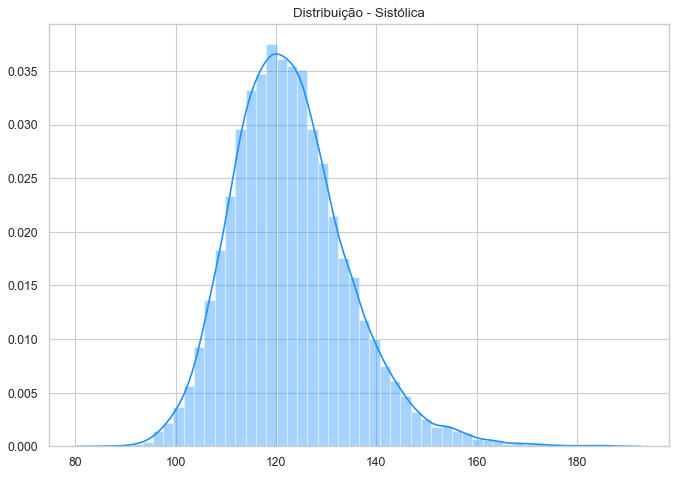

Os dados seguem distribuição normal - A Hipótese Nula pode ser rejeitada


In [33]:
verificar_normalidade(dataset_apos_tratamento.loc[:,'sist 9:00':'sist 8:45'].mean(axis=1),'Distribuição - Sistólica')

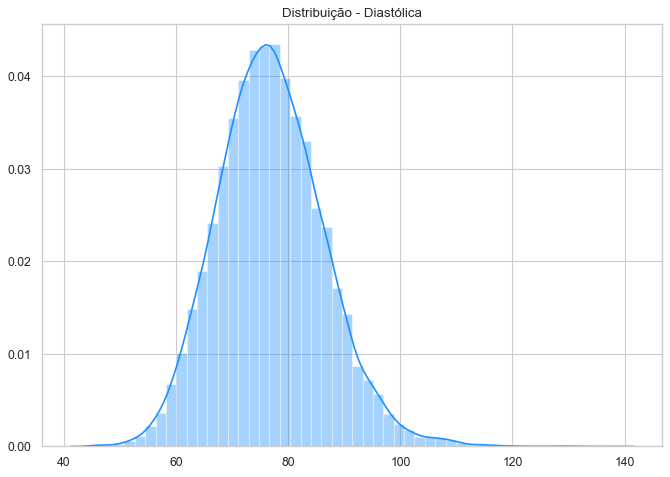

Os dados seguem distribuição normal - A Hipótese Nula pode ser rejeitada


In [34]:
verificar_normalidade(dataset_apos_tratamento.loc[:,'diast 9:00':'diast 8:45'].mean(axis=1),'Distribuição - Diastólica')

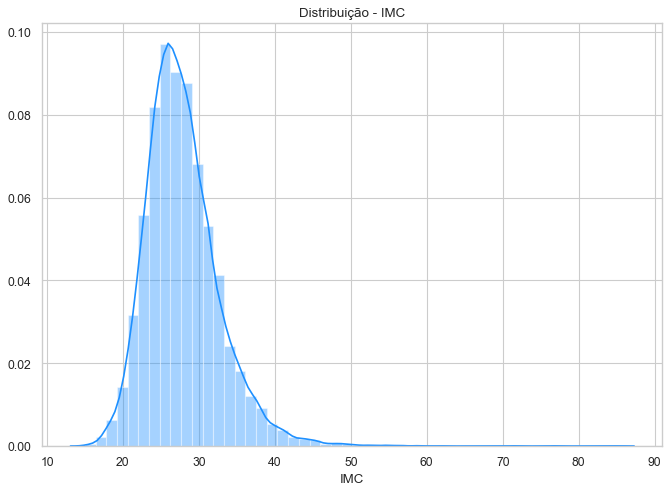

Os dados seguem distribuição normal - A Hipótese Nula pode ser rejeitada


In [35]:
verificar_normalidade(dataset_apos_tratamento.loc[:,'IMC'],'Distribuição - IMC')

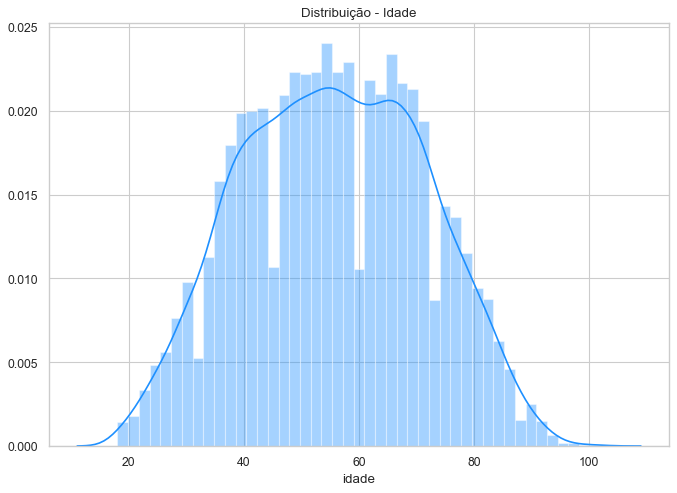

Os dados seguem distribuição normal - A Hipótese Nula pode ser rejeitada


In [36]:
verificar_normalidade(dataset_apos_tratamento.loc[:,'idade'],'Distribuição - Idade')

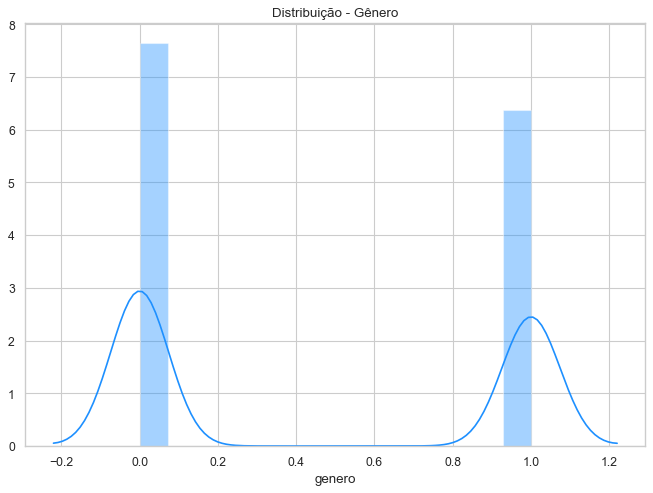

Os dados seguem distribuição normal - A Hipótese Nula pode ser rejeitada


In [37]:
verificar_normalidade(dataset_apos_tratamento.loc[:,'genero'],'Distribuição - Gênero')

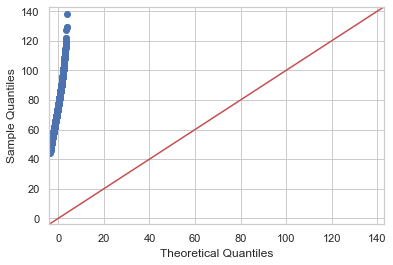

In [38]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

dados1 = norm.rvs(dataset_apos_tratamento.loc[:,'diast 9:00':'diast 8:45'].mean(axis=1).values)
sm.qqplot(dados1, line='45')



my_data = norm.rvs(size=1000)

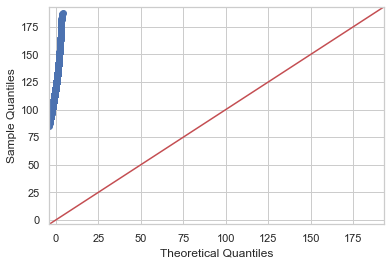

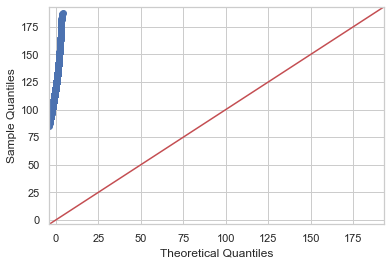

In [39]:
dados1 = (dataset_apos_tratamento.loc[:,'sist 9:00':'sist 8:45'].mean(axis=1).values)
sm.qqplot(dados1, line='45')

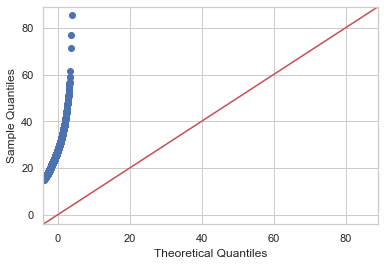

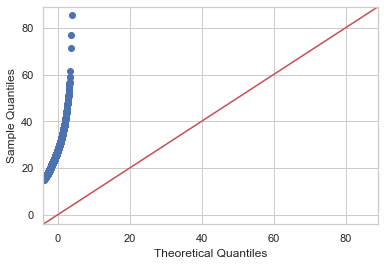

In [40]:
dados1 = (dataset_apos_tratamento.loc[:,'IMC'].values)
sm.qqplot(dados1, line='45')

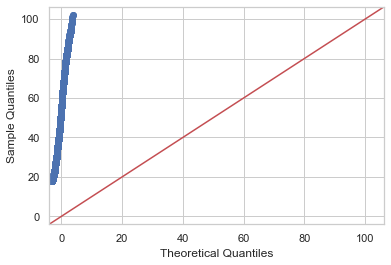

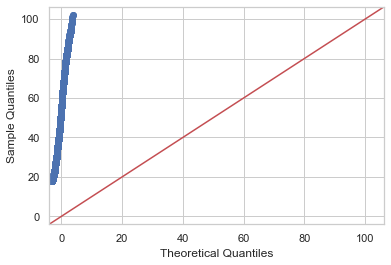

In [41]:
dados1 = (dataset_apos_tratamento.loc[:,'idade'].values)
sm.qqplot(dados1, line='45')

In [42]:
# Para o algoritmo não interpretar as variaveis categóricas como valores absolutos
# used to convert categorical variables into dummy variables (can have a value of 0 or 1)
# https://www.educative.io/answers/what-is-the-getdummies-function-in-pandas
#
#
df_dummy_age_imc = dataset_por_classes
df_dummy_age_imc = pd.get_dummies(df_dummy_age_imc,columns=['idade'])#,drop_first=True)
df_dummy_age_imc = pd.get_dummies(df_dummy_age_imc,columns=['IMC'])#,drop_first=True)
df_dummy_age_imc

,numero_identificacao,genero,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,...,Reverse Dipping,Morning Surge,Masked,Whitecoat,idade_1,idade_2,idade_3,IMC_1,IMC_2,IMC_3
0,4,1,105.0,108.0,116.0,104.0,106.0,98.0,102.0,107.0,...,1,0,0,0,0,0,1,0,0,1
1,5,1,103.0,114.0,82.0,104.0,98.0,106.0,108.0,107.0,...,1,0,0,0,0,0,1,0,1,0
2,6,1,147.0,148.0,156.0,140.0,130.0,132.0,121.0,113.0,...,0,0,0,1,1,0,0,0,1,0
3,7,0,140.0,139.0,142.0,137.0,135.0,177.0,148.0,152.0,...,0,0,0,1,1,0,0,1,0,0
4,8,1,113.0,110.0,101.0,108.0,111.0,111.0,114.0,115.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19145,21786,1,163.0,198.0,172.0,148.0,161.0,156.0,156.0,138.0,...,0,1,0,1,1,0,0,0,1,0
19146,21787,1,114.0,120.0,164.0,116.0,119.0,126.0,123.0,122.0,...,0,0,0,1,1,0,0,0,1,0
19147,21788,0,107.0,110.0,103.0,105.0,108.0,111.0,114.0,144.0,...,0,0,0,1,1,0,0,0,0,1
19148,21792,0,94.0,107.0,112.0,124.0,120.0,94.0,102.0,113.0,...,0,0,0,0,0,0,1,0,1,0


# Abordagem 1: Cadastro e Medidas como entrada

## Padronizando os dados para colocar em intervalo de valores comuns na Abordagem1
#### Standardize features by removing the mean and scaling to unit variance.
#### many elements used in the objective function of a learning algorithm assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

The standard score of a sample x is calculated as:
z = (x - mean) / standar deviation
mean of the training samples

#### Padronização É sensível a outliers
É utilzada quando os dados seguem a Distribuição Gaussiana

In [43]:
# Import da bib
from sklearn.preprocessing import StandardScaler
dados_cadastro_sem_id = dataset_cadastro.loc[:,'genero':'diast 8:45']
colunas_padroniza = dados_cadastro_sem_id.columns
scaler_standard =StandardScaler()

df_padronizado = pd.DataFrame(scaler_standard.fit_transform(dados_cadastro_sem_id), columns=colunas_padroniza)
df_padronizado

,genero,idade,IMC,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,1.095508,2.432844,1.122371,-1.235440,-1.075162,-0.626259,-1.317066,-1.192180,-1.641709,-1.419798,...,-2.282628,-2.181080,-1.742818,-1.493498,-1.202731,-0.834170,-1.318031,-0.790172,-1.330667,-2.156791
1,1.095508,0.912494,0.326553,-1.349440,-0.734744,-2.568849,-1.317066,-1.653899,-1.180969,-1.069513,...,0.001279,-0.083538,-0.156437,-0.515630,-0.784036,-1.114470,-1.389191,-0.430827,-0.748325,-0.987588
2,1.095508,-2.318249,-0.427379,1.158563,1.194293,1.659141,0.753063,0.192979,0.316433,-0.310562,...,0.416535,0.815409,1.154051,0.951173,0.751181,0.567335,0.460973,0.503469,0.125188,0.108541
3,-0.912818,-0.987943,-0.762461,0.759562,0.683666,0.859251,0.580552,0.481553,2.908092,1.265721,...,-1.728953,-1.431958,-0.984115,0.392391,1.797920,1.408238,1.030254,0.647207,0.707531,-0.622212
4,1.095508,-1.748118,2.672122,-0.779439,-0.961689,-1.483284,-1.087052,-0.903605,-0.893007,-0.719228,...,-0.690814,-0.158450,0.464320,1.090869,-0.714253,0.847636,0.532133,0.287862,0.052396,-0.622212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19145,1.095508,-0.544507,-0.071356,2.070564,4.031112,2.573301,1.213091,1.982142,1.698651,1.732768,...,1.939140,2.912950,3.430163,3.325997,3.193572,3.090043,3.093898,2.947013,2.818521,3.104624
19146,1.095508,-0.417812,-0.197011,-0.722439,-0.394325,2.116221,-0.627023,-0.441885,-0.029121,-0.193800,...,0.901000,-0.158450,-1.191034,-0.236239,-0.714253,0.497260,1.172574,1.940848,1.872215,0.912368
19147,-0.912818,-1.304682,1.143314,-1.121440,-0.961689,-1.369014,-1.259562,-1.076750,-0.893007,-0.719228,...,-1.728953,-1.881431,-1.811792,-1.703042,-1.830775,-1.184546,-0.819910,-1.365123,-1.185082,-1.499114
19148,-0.912818,0.785798,-0.594920,-1.862440,-1.131898,-0.854799,-0.166995,-0.384170,-1.872078,-1.419798,...,-0.760023,-0.907572,-0.846168,-0.096543,-0.435123,-0.694019,-0.321789,-0.430827,-0.821118,-0.987588


## Normalizando os dados para colocar em intervalo de valores comuns na Abordagem1
#### Normalizar é responder quantos desvios padrões o valor está longe da média.

#### “E para Random Forest? Preciso normalizar meus dados?”

Deixar variáveis com escalas similares é algo importante em algoritmos que trabalham com distâncias euclidianas, como é o caso das regressões lineares multivariadas. Random Forest, como o próprio nome diz, é apenas uma coleção de “árvores”, e os processos utilizados para a geração dessas “árvores” não envolvem o uso de distâncias euclidianas. Random Forest trabalha com a técnica de particionamento recursivo.
https://medium.com/tentando-ser-um-unic%C3%B3rnio/porqu%C3%AA-e-quando-%C3%A9-necess%C3%A1rio-normalizar-os-dados-92e5cce445aa

#### Normalização NÂO é sensível a outliers, ou seja, não influencia os valores Min e Max
É usada quando os dados NÃO seguem uma Distribuição Gaussiana.
É útil quando o algoritmo de ML não assume nenhuma distribuição, como é caso de K-means ou quando a distância é Euclidiana

In [44]:
# Importe da bib
from sklearn.preprocessing import MinMaxScaler

colunas_normaliza = dados_cadastro_sem_id.columns
scaler_minMax = MinMaxScaler()

df_normalizado = pd.DataFrame(scaler_minMax.fit_transform(dados_cadastro_sem_id), columns=colunas_normaliza)
df_normalizado

,genero,idade,IMC,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,1.0,0.904762,0.258523,0.217391,0.234146,0.280612,0.232044,0.255556,0.190476,0.212121,...,0.086957,0.141593,0.162791,0.213115,0.238462,0.258741,0.227273,0.300000,0.251969,0.155556
1,1.0,0.619048,0.204545,0.207729,0.263415,0.107143,0.232044,0.211111,0.232804,0.242424,...,0.373913,0.389381,0.341085,0.327869,0.284615,0.230769,0.219697,0.338462,0.314961,0.274074
2,1.0,0.011905,0.153409,0.420290,0.429268,0.484694,0.430939,0.388889,0.370370,0.308081,...,0.426087,0.495575,0.488372,0.500000,0.453846,0.398601,0.416667,0.438462,0.409449,0.385185
3,0.0,0.261905,0.130682,0.386473,0.385366,0.413265,0.414365,0.416667,0.608466,0.444444,...,0.156522,0.230088,0.248062,0.434426,0.569231,0.482517,0.477273,0.453846,0.472441,0.311111
4,1.0,0.119048,0.363636,0.256039,0.243902,0.204082,0.254144,0.283333,0.259259,0.272727,...,0.286957,0.380531,0.410853,0.516393,0.292308,0.426573,0.424242,0.415385,0.401575,0.311111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19145,1.0,0.345238,0.177557,0.497585,0.673171,0.566327,0.475138,0.561111,0.497354,0.484848,...,0.617391,0.743363,0.744186,0.778689,0.723077,0.650350,0.696970,0.700000,0.700787,0.688889
19146,1.0,0.369048,0.169034,0.260870,0.292683,0.525510,0.298343,0.327778,0.338624,0.318182,...,0.486957,0.380531,0.224806,0.360656,0.292308,0.391608,0.492424,0.592308,0.598425,0.466667
19147,0.0,0.202381,0.259943,0.227053,0.243902,0.214286,0.237569,0.266667,0.259259,0.272727,...,0.156522,0.176991,0.155039,0.188525,0.169231,0.223776,0.280303,0.238462,0.267717,0.222222
19148,0.0,0.595238,0.142045,0.164251,0.229268,0.260204,0.342541,0.333333,0.169312,0.212121,...,0.278261,0.292035,0.263566,0.377049,0.323077,0.272727,0.333333,0.338462,0.307087,0.274074


In [45]:
#dados1 = (df_normalizado.loc[:,'sist 9:00':'sist 8:45'].mean(axis=1).values)
#sm.qqplot(dados1, line='45')

## Tipo de distribuição dos dados: histograma de cada feature

In [46]:
# Plota Histograma de cada feature e calcula média, devio-padrão e variância
#
def hist(serie):
    serie.hist()
    print(f"MEDIA = {serie.mean()}")
    print(f"DESVIO-PADRÃO = {serie.std()}")
    print(f"VARIÃNCIA = {serie.var()}")

MEDIA = IMC    27.840721
dtype: float64
DESVIO-PADRÃO = IMC    4.775087
dtype: float64
VARIÃNCIA = IMC    22.801454
dtype: float64


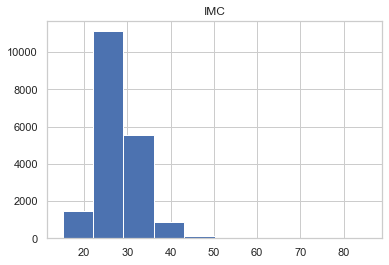

In [47]:
column = ['IMC']
hist(dados_cadastro_sem_id[column])

MEDIA = genero    0.454517
dtype: float64
DESVIO-PADRÃO = genero    0.49794
dtype: float64
VARIÃNCIA = genero    0.247944
dtype: float64


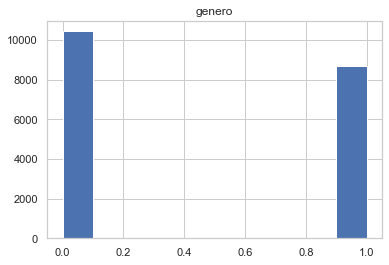

In [48]:
column = ['genero']
hist(dados_cadastro_sem_id[column])

MEDIA = idade    55.595509
dtype: float64
DESVIO-PADRÃO = idade    15.786255
dtype: float64
VARIÃNCIA = idade    249.20585
dtype: float64


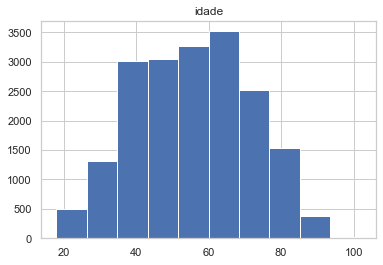

In [49]:
column = ['idade']
hist(dados_cadastro_sem_id[column])

MEDIA = idade    0.447566
dtype: float64
DESVIO-PADRÃO = idade    0.187932
dtype: float64
VARIÃNCIA = idade    0.035318
dtype: float64


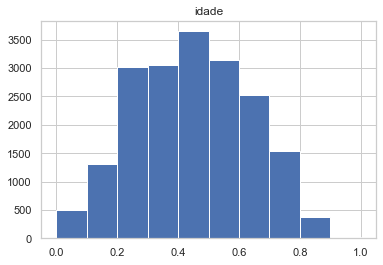

In [50]:
column = ['idade']
hist(df_normalizado[column])

MEDIA = idade   -1.409954e-16
dtype: float64
DESVIO-PADRÃO = idade    1.000026
dtype: float64
VARIÃNCIA = idade    1.000052
dtype: float64


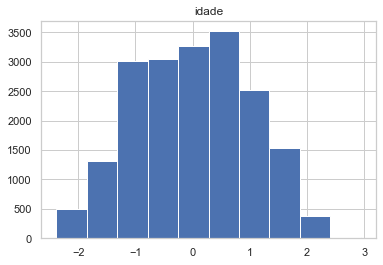

In [51]:
column = ['idade']
hist(df_padronizado[column])

## Abordagem 1 com dados PADRONIZADOS: Número de Clusters gerado pelo k-Means

In [52]:
dados_cadastro_sem_id = dataset_cadastro.loc[:,'genero':'diast 8:45']
dados_cadastro_sem_id = df_padronizado
dados_cadastro_array = np.array(dados_cadastro_sem_id)

grupos_cadastro_funcao = aplica_kmeans(dados_cadastro_sem_id, 'Cadastro')
print(grupos_cadastro_funcao)




Numero otimo de cluster - Abordagem Cadastro: 7


Tempo de execucao: 37.655 s


[1 1 7 ... 1 3 2]


In [53]:
#dados_cadastro_sem_id = dataset_cadastro.loc[:,'genero':'diast 8:45']
dados_cadastro_sem_id 

,genero,idade,IMC,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,1.095508,2.432844,1.122371,-1.235440,-1.075162,-0.626259,-1.317066,-1.192180,-1.641709,-1.419798,...,-2.282628,-2.181080,-1.742818,-1.493498,-1.202731,-0.834170,-1.318031,-0.790172,-1.330667,-2.156791
1,1.095508,0.912494,0.326553,-1.349440,-0.734744,-2.568849,-1.317066,-1.653899,-1.180969,-1.069513,...,0.001279,-0.083538,-0.156437,-0.515630,-0.784036,-1.114470,-1.389191,-0.430827,-0.748325,-0.987588
2,1.095508,-2.318249,-0.427379,1.158563,1.194293,1.659141,0.753063,0.192979,0.316433,-0.310562,...,0.416535,0.815409,1.154051,0.951173,0.751181,0.567335,0.460973,0.503469,0.125188,0.108541
3,-0.912818,-0.987943,-0.762461,0.759562,0.683666,0.859251,0.580552,0.481553,2.908092,1.265721,...,-1.728953,-1.431958,-0.984115,0.392391,1.797920,1.408238,1.030254,0.647207,0.707531,-0.622212
4,1.095508,-1.748118,2.672122,-0.779439,-0.961689,-1.483284,-1.087052,-0.903605,-0.893007,-0.719228,...,-0.690814,-0.158450,0.464320,1.090869,-0.714253,0.847636,0.532133,0.287862,0.052396,-0.622212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19145,1.095508,-0.544507,-0.071356,2.070564,4.031112,2.573301,1.213091,1.982142,1.698651,1.732768,...,1.939140,2.912950,3.430163,3.325997,3.193572,3.090043,3.093898,2.947013,2.818521,3.104624
19146,1.095508,-0.417812,-0.197011,-0.722439,-0.394325,2.116221,-0.627023,-0.441885,-0.029121,-0.193800,...,0.901000,-0.158450,-1.191034,-0.236239,-0.714253,0.497260,1.172574,1.940848,1.872215,0.912368
19147,-0.912818,-1.304682,1.143314,-1.121440,-0.961689,-1.369014,-1.259562,-1.076750,-0.893007,-0.719228,...,-1.728953,-1.881431,-1.811792,-1.703042,-1.830775,-1.184546,-0.819910,-1.365123,-1.185082,-1.499114
19148,-0.912818,0.785798,-0.594920,-1.862440,-1.131898,-0.854799,-0.166995,-0.384170,-1.872078,-1.419798,...,-0.760023,-0.907572,-0.846168,-0.096543,-0.435123,-0.694019,-0.321789,-0.430827,-0.821118,-0.987588


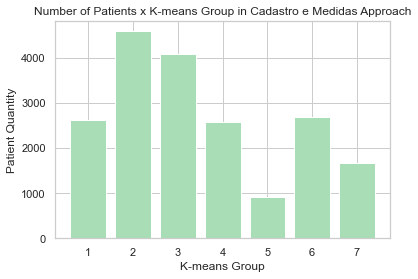

In [54]:
grupos = grupos_cadastro_funcao
abordagem = 'Cadastro e Medidas'
caminho = DIR_KMEANS / 'graficos' / "padrao" / f'grafico_kmeans_grupo_padrao_pacientes_{abordagem.lower().replace(" ","_")}.svg'
classes_cadastro = grafico_barras_grupos(grupos,abordagem,caminho)

In [55]:
dados_cadastro_sem_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19150 entries, 0 to 19149
Columns: 167 entries, genero to diast 8:45
dtypes: float64(167)
memory usage: 24.4 MB


In [56]:
#grupos = grupos_cadastro_funcao
#abordagem = 'Abordagem Cadastro e Medidas'
#caminho = DIR_KMEANS / 'graficos' / 'grafico_Random_Abordagem1_pacientes_por_grupos.svg'
#classes_cadastro = grafico_barras_grupos(grupos,abordagem,caminho)

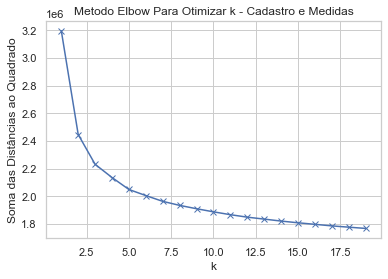

Tempo de execucao: 33.082 s




In [57]:
# Elbow com dados PADRONALIZADOS
#
grupos = grupos_cadastro_funcao
abordagem = 'Cadastro e Medidas'
caminho = DIR_KMEANS / 'graficos' / f'metodo_elbow_padrao_{abordagem.lower().replace(" ","_")}.svg'
aplica_elbow(dados_cadastro_sem_id,abordagem,caminho)

In [58]:
#grupos = grupos_cadastro_funcao
#abordagem = 'Abordagem Cadastro e Medidas'
#caminho = DIR_KMEANS / 'graficos' / f'metodo_elbow_{abordagem.lower().replace(" ","_")}.svg'
#aplica_elbow(dados_cadastro_sem_id,abordagem,caminho)

### Abordagem 1 com dados PADRONIZADOS: Silhouette

In [59]:
#classes_cadastro
#grupos = grupos_cadastro_funcao
#abordagem = 'Abordagem Cadastro e Medidas'
##caminho = DIR_KMEANS / 'graficos' / f'metodoelbow_cadastro.svg'
#aplica_silhouette(dados_cadastro_sem_id,grupos,abordagem)

In [60]:
dados_cadastro_sem_id

,genero,idade,IMC,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,1.095508,2.432844,1.122371,-1.235440,-1.075162,-0.626259,-1.317066,-1.192180,-1.641709,-1.419798,...,-2.282628,-2.181080,-1.742818,-1.493498,-1.202731,-0.834170,-1.318031,-0.790172,-1.330667,-2.156791
1,1.095508,0.912494,0.326553,-1.349440,-0.734744,-2.568849,-1.317066,-1.653899,-1.180969,-1.069513,...,0.001279,-0.083538,-0.156437,-0.515630,-0.784036,-1.114470,-1.389191,-0.430827,-0.748325,-0.987588
2,1.095508,-2.318249,-0.427379,1.158563,1.194293,1.659141,0.753063,0.192979,0.316433,-0.310562,...,0.416535,0.815409,1.154051,0.951173,0.751181,0.567335,0.460973,0.503469,0.125188,0.108541
3,-0.912818,-0.987943,-0.762461,0.759562,0.683666,0.859251,0.580552,0.481553,2.908092,1.265721,...,-1.728953,-1.431958,-0.984115,0.392391,1.797920,1.408238,1.030254,0.647207,0.707531,-0.622212
4,1.095508,-1.748118,2.672122,-0.779439,-0.961689,-1.483284,-1.087052,-0.903605,-0.893007,-0.719228,...,-0.690814,-0.158450,0.464320,1.090869,-0.714253,0.847636,0.532133,0.287862,0.052396,-0.622212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19145,1.095508,-0.544507,-0.071356,2.070564,4.031112,2.573301,1.213091,1.982142,1.698651,1.732768,...,1.939140,2.912950,3.430163,3.325997,3.193572,3.090043,3.093898,2.947013,2.818521,3.104624
19146,1.095508,-0.417812,-0.197011,-0.722439,-0.394325,2.116221,-0.627023,-0.441885,-0.029121,-0.193800,...,0.901000,-0.158450,-1.191034,-0.236239,-0.714253,0.497260,1.172574,1.940848,1.872215,0.912368
19147,-0.912818,-1.304682,1.143314,-1.121440,-0.961689,-1.369014,-1.259562,-1.076750,-0.893007,-0.719228,...,-1.728953,-1.881431,-1.811792,-1.703042,-1.830775,-1.184546,-0.819910,-1.365123,-1.185082,-1.499114
19148,-0.912818,0.785798,-0.594920,-1.862440,-1.131898,-0.854799,-0.166995,-0.384170,-1.872078,-1.419798,...,-0.760023,-0.907572,-0.846168,-0.096543,-0.435123,-0.694019,-0.321789,-0.430827,-0.821118,-0.987588


In [61]:
# Random Forest com dados PADRONIZADOS
#
classes_cadastro
grupos = grupos_cadastro_funcao
abordagem = 'Cadastro e Medidas'
#caminho = DIR_KMEANS / 'graficos' / f'metodoelbow_cadastro.svg'
importancia_cadastro = aplica_random_forest(dados_cadastro_sem_id,grupos,abordagem,classes_cadastro)

TypeError: aplica_random_forest() missing 1 required positional argument: 'num_kfold'

## Random Forest com dados PADRONIZADOS - kfold

In [ ]:
def aplica_random_forest_kfold(dados_sem_id,grupos,abordagem,classes):
    dados_array = np.array(dados_sem_id)
    random_forest = RandomForestClassifier(n_estimators=50)
    
    train_ratio = 0.75
    validation_ratio = 0.15
    test_ratio = 0.10

    # separar train(75%) - 14.485, test (10%) - 7.726  and validation (15%) - 11.588
    #  O parâmetro random_state=42 garante o rastreio do numero de identificação
    # 
    x_train, x_test, y_train, y_test = train_test_split(dados_array,grupos,test_size=1-train_ratio,random_state=42)
    x_val, x_test, y_val, y_test = train_test_split(dados_array,grupos,test_size=test_ratio/(test_ratio + validation_ratio),random_state=42)
    
    #treino
    random_forest.fit(x_train, y_train)
    
    #calcular acuracia, recall e f1
    y_prev_val = random_forest.predict(x_val)

    accuracy = np.round(accuracy_score(y_val, y_prev_val),2)
    recall = np.round(recall_score(y_val, y_prev_val,average='macro'),2)
    f1 = np.round(f1_score(y_val, y_prev_val,average='macro'),2)
    
    
    
    print("\n\n=================Validação==============\n\n")
    print(f'Accuracy: {accuracy:.2f} - Recall: {recall:.2f} - F1 Score: {f1:.2f}\n\n')
    
    #Matriz de Confusão Validação
    mat=list(metrics.confusion_matrix(y_val, y_prev_val, labels=classes))
    df_confusion_matrix_val = pd.DataFrame(mat,index = classes, columns = classes)
    
    print(df_confusion_matrix_val)
    
    #calcular acuracia, recall e f1
    y_prev_test = random_forest.predict(x_test)

    accuracy = np.round(accuracy_score(y_test, y_prev_test),2)
    recall = np.round(recall_score(y_test, y_prev_test,average='macro'),2)
    f1 = np.round(f1_score(y_test, y_prev_test,average='macro'),2)
    
    
    
    print("\n\n=================Teste==============\n\n")
    print(f'Accuracy: {accuracy:.2f} - Recall: {recall:.2f} - F1 Score: {f1:.2f}\n\n')
    
    #Matriz da Confusão Teste
    mat=list(metrics.confusion_matrix(y_test, y_prev_test, labels=classes))
    df_confusion_matrix_test = pd.DataFrame(mat,index = classes, columns = classes)
    
    print(df_confusion_matrix_test)
    
    
    
    ##validacao
    #pacientes_validacao_diast_sisto = x_val[['numero_identificacao']]
    #pacientes_validacao_diast_sisto['Grupo_Real'] = y_val_
    #pacientes_validacao_diast_sisto['Grupo_Previsto'] = y_prev_val
    #
    #pacientes_validacao_diast_sisto.to_csv(path_or_buf = DIR_KMEANS / "padrao_doenca" / f'pacientes_validacao_{abordagem.lower().replace(" " ,"_")}.csv', 
    #             sep=';',index=False,encoding='UTF-8')
    #
    ##teste
    #pacientes_teste_diast_sisto = x_test[['numero_identificacao']]
    #pacientes_teste_diast_sisto['Grupo_Real'] = y_test_
    #pacientes_teste_diast_sisto['Grupo_Previsto'] = y_prev_test
    #
    #pacientes_teste_diast_sisto.to_csv(path_or_buf = DIR_KMEANS / "padrao_doenca" / f'pacientes_teste_{abordagem.lower().replace(" " ,"_")}.csv', 
    #             sep=';',index=False,encoding='UTF-8')
    #
    #
    
    cabecalho = list(dados_sem_id.columns)
    #calculo da importancia de cada variavel para idenficar os grupos com 3 casas decimais
    importancia = pd.DataFrame({'features':cabecalho,'importance':np.round(random_forest.feature_importances_,3)})
    importancia = importancia.sort_values('importance',ascending=False)

    importancia.to_csv(path_or_buf = DIR_KMEANS / "padrao_doenca" / f'importancia_features_{abordagem.lower().replace(" " ,"_")}.csv', 
                 sep=';',index=False,encoding='UTF-8')

    print("\n\n=================Importancia==============\n\n")
    print(importancia)
    return importancia

In [ ]:
# Nessa etapa a variavel dados_cadastro_sem_id teve os dados padronizados
#
experiment = "random_forest"
DATASET_NAME = 'Cadastro_e_Medidas'
df = dados_cadastro_sem_id
#features_names = build_datasets(df,DATASET_NAME,N_KFOLDS, N_RUNS)

from sklearn.ensemble import RandomForestClassifier

for exp_n in range(N_EXPERIMENTS):
    exp_train_x, exp_train_y, exp_valid_x, exp_valid_y = get_kfold(DATASET_NAME, exp_n)
    model = RandomForestClassifier(random_state=42)
    model.fit(exp_train_x, exp_train_y)
    
    cabecalho = list(df.columns)[:-1]
    #calculo da importancia de cada variavel para idenficar os grupos com 3 casas decimais
    importancia = pd.DataFrame({'features':cabecalho,'importance':np.round(model.feature_importances_,3)})
    importancia = importancia.sort_values('importance',ascending=False)

    #importancia.to_csv(path_or_buf = DIR_KMEANS / "padrao_doenca" / f'importancia_features_{abordagem.lower().replace(" " ,"_")}.csv', 
    #             sep=';',index=False,encoding='UTF-8')

    print(f"\n\n=================Importancia exp_{exp_n}==============\n\n")
    print(importancia)
    #dump(model,EXPERIMENT_DIR + experiment + '_model_{}.joblib'.format(exp_n))
 
    
    #evaluate_classifier(experiment + '_exp_', exp_n, exp_valid_x, exp_valid_y , model, "_id_{}".format(exp_n))
    


## Abordagem 1 com dados NORMALIZADOS: Número de Clusters gerado pelo k-Means

In [ ]:
dados_cadastro_sem_id = dataset_cadastro.loc[:,'genero':'diast 8:45']
dados_cadastro_sem_id = df_normalizado
dados_cadastro_array = np.array(dados_cadastro_sem_id)

grupos_cadastro_funcao = aplica_kmeans(dados_cadastro_sem_id, 'Cadastro')
print(grupos_cadastro_funcao)

In [ ]:
dados_cadastro_sem_id 

In [ ]:

grupos = grupos_cadastro_funcao
abordagem = 'Cadastro e Medidas'
caminho = DIR_KMEANS / 'graficos' / "normal" / f'grafico_kmeans_grupo_normal_pacientes_{abordagem.lower().replace(" ","_")}.svg'
classes_cadastro = grafico_barras_grupos(grupos,abordagem,caminho)

## Abordagem 1: O método Elbow

### Esse método para calcular o melhor número de cluster para o algoritmo e mostar o gráfico

### https://minerandodados.com.br/algoritmo-k-means-python-passo-passo/#:~:text=O%20m%C3%A9todo%20Elbow%20se%20trata,um%20valor%20significativo%20de%20ganho.

In [ ]:
# Elbow com dados NORMALIZADOS
#
grupos = grupos_cadastro_funcao
abordagem = 'Cadastro e Medidas'
caminho = DIR_KMEANS / 'graficos' / f'metodo_elbow_normal_{abordagem.lower().replace(" ","_")}.svg'
aplica_elbow(dados_cadastro_sem_id,abordagem,caminho)

## Abordagem 1: Silhouette

####  A análise da Silhouette pode ser usada para determinar o grau de separação entre os clusters. O coeficiente de Silhouette quando próximo de +1, indica que os pontos estão muito longe dos pontos do outro cluster, e quando próximo de 0, indica que os pontos então muito perto ou até interseccionando um outro cluster



In [ ]:
#classes_cadastro
#grupos = grupos_cadastro_funcao
#abordagem = 'Cadastro e Medidas'
#caminho = DIR_KMEANS / 'graficos' / f'metodo_silhouette_normal_{abordagem.lower().replace(" ","_")}.svg'
#aplica_silhouette(dados_cadastro_sem_id,grupos,abordagem)

### Não existe um valor de k clusters que não esteja se intersectando 

In [ ]:
##dataset com grupos e com os dados de cadastro e medidas
## nume id, data exame, idade, peso, altura, medidas, 22 estaitsticos, 11 doenças em cada grupo 
#dataset_s_d = dataset_apos_tratamento.loc[:,'numero_identificacao':'altura']
#dataset_s_d['IMC'] = dataset_cadastro['IMC']
#dataset_s_d['grupo'] = grupos_cadastro
#dataset_s_d = pd.concat([dataset_s_d,dataset_apos_tratamento.loc[:,'sist 9:00':]],axis=1)
#dataset_s_d
#
## Salva dataset com dados completos após o K-Means com abordagem 1 (cadastro e medidas)
#dataset_s_d.to_csv(path_or_buf = DIR_KMEANS / "padrao_doenca" / 'mapa_apos_kmeans_cadastro.csv', 
#             sep=';',index=False,encoding='UTF-8')

In [ ]:
df_dummy_genero = pd.get_dummies(dados_cadastro_sem_id,columns=['genero'])#,drop_first=True)
df_dummy_genero

## Abordagem 1 com dados Normalizados: Random Forest

#### Abordagem 2: Importância das Features Random Forest

In [ ]:
# Random Forest com dados NORMALIZADOS
#
############################################ faltou usar as features DUMMIES ################################
df_dummy_genero = pd.get_dummies(dados_cadastro_sem_id,columns=['genero'])#,drop_first=True)

classes_cadastro
grupos = grupos_cadastro_funcao
abordagem = 'Cadastro e Medidas'
numero_kfolds = 9 
#caminho = DIR_KMEANS / 'graficos' / f'metodoelbow_cadastro.svg'
importancia_cadastro = aplica_random_forest(dados_cadastro_sem_id,grupos,abordagem,classes_cadastro,numero_kfolds)

In [ ]:
dados_completos_cadastro = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],
                                    pd.DataFrame({'grupo':grupos_cadastro_funcao}),
                                    dataset_apos_tratamento.loc[:,'sist 9:00':]],
                                   axis=1)

gera_arquivos_por_grupo(dados_completos_cadastro,'cadastro')

# Abordagem 2: Medidas como entrada

In [ ]:
#!pip install xlsxwriter --upgrade

## Abordagem 2: Número de Clusters gerado pelo k-Means

In [ ]:
dados_medidas_sem_id = df_normalizado.loc[:,'sist 9:00':'diast 8:45']
#df_padronizado
#df_normalizado
#dataset_apos_tratamento
dados_medidas_array = np.array(dados_medidas_sem_id)

grupos_medidas_funcao = aplica_kmeans(dados_medidas_sem_id, 'Medidas')
print(grupos_medidas_funcao)

In [ ]:
grupos = grupos_medidas_funcao
abordagem = 'Medidas'
caminho = DIR_KMEANS / 'graficos' / f'grafico_kmeans_grupo_pacientes_{abordagem.lower().replace(" ","_")}.svg'
classes_medidas = grafico_barras_grupos(grupos,abordagem,caminho)

###  Abordagem 2: Método Elbow
####  Esse método para calcular o melhor número de cluster para o algoritmo e mostar o gráfico
####  https://minerandodados.com.br/algoritmo-k-means-python-passo-passo/#:~:text=O%20m%C3%A9todo%20Elbow%20se%20trata,um%20valor%20significativo%20de%20ganho.

In [ ]:
grupos = grupos_medidas_funcao
abordagem = 'Medidas'
caminho = DIR_KMEANS / 'graficos' / f'metodo_elbow_{abordagem.lower().replace(" ","_")}.svg'
aplica_elbow(dados_medidas_sem_id,abordagem,caminho)

### Abordagem 2: Silhouette

####  A análise da Silhouette pode ser usada para determinar o grau de separação entre os clusters. O coeficiente de Silhouette quando próximo de +1, indica que os pontos estão muito longe dos pontos do outro cluster, e quando próximo de 0, indica que os pontos então muito perto ou até interseccionando um outro cluster



In [ ]:
#grupos = grupos_medidas_funcao
#abordagem = 'Medidas'
#aplica_silhouette(dados_medidas_sem_id,grupos,abordagem)

### Abordagem 2: Random Forest

In [ ]:
# 4 parâmetros são entregues ao Random Forest: os dados padronizados, os grupos (target), o tipo de abordagem e
# os grupos que servirão para plotar a Matriz de Confusão
# 
grupos = grupos_medidas_funcao
abordagem = 'Medidas'
importancia_medidas = aplica_random_forest(dados_medidas_sem_id,grupos,abordagem,classes_medidas)

In [ ]:
#dados_completos_sist = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],
#                                    pd.DataFrame({'grupo':grupos_sist_funcao}),
#                                    dataset_apos_tratamento.loc[:,'sist 9:00':]],
#                                   axis=1)
#
#gera_arquivos_por_grupo(dados_completos_simples,'simplificado')

In [ ]:
dados_completos_medidas = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],
                                    pd.DataFrame({'grupo':grupos_medidas_funcao}),
                                    dataset_apos_tratamento.loc[:,'sist 9:00':]],
                                   axis=1)

gera_arquivos_por_grupo(dados_completos_medidas,'medidas')

# Abordagem 2.1: Medidas Importantes

## Abordagem 2.1: Número de Clusters gerado pelo k-Means

In [ ]:
ls_importantes = importancia_medidas['features'].iloc[:7].values
dados_medidas_importantes_sem_id = df_padronizado[ls_importantes]
grupos_medidas_importantes_funcao = aplica_kmeans(dados_medidas_importantes_sem_id, 'Medidas Importantes')
print(grupos_medidas_importantes_funcao)

In [ ]:
grupos = grupos_medidas_importantes_funcao
abordagem = 'Medidas Importantes'
caminho = DIR_KMEANS / 'graficos' / f'grafico_kmeans_grupo_pacientes_{abordagem.lower().replace(" ","_")}.svg'
classes_medidas_importantes = grafico_barras_grupos(grupos,abordagem,caminho)

In [ ]:
grupos = grupos_medidas_importantes_funcao
abordagem = 'Medidas Importantes'
caminho = DIR_KMEANS / 'graficos' / f'metodo_elbow_{abordagem.lower().replace(" ","_")}.svg'
aplica_elbow(dados_medidas_importantes_sem_id,abordagem,caminho)

In [ ]:
grupos = grupos_medidas_importantes_funcao
abordagem = 'Medidas Importantes'
aplica_silhouette(dados_medidas_importantes_sem_id,grupos,abordagem)

In [ ]:
grupos = grupos_medidas_importantes_funcao
abordagem = 'Medidas Importantes'
importancia_medidas_importantes = aplica_random_forest(dados_medidas_importantes_sem_id,grupos,abordagem,classes_medidas_importantes)

In [ ]:
dados_completos_medidas_importantes = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],
                                    pd.DataFrame({'grupo':grupos_medidas_importantes_funcao}),
                                    dataset_apos_tratamento.loc[:,'sist 9:00':]],
                                   axis=1)

gera_arquivos_por_grupo(dados_completos_medidas_importantes,'medidas_importantes')

# Abordagem 2.2: Features Selection: Select Kbest na Abordagem 2

#### A técnica Select K-Best não pode receber valores negativos, portanto o dataset NÃO pode ser padronizado, 
#### já que gera valores negativos

In [ ]:
#  Uso do SelectKBest para identificar as melhores 5 features

#from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
dados_medidas_sem_id
#medidas_mais_importantes_ml = SelectKBest(chi2, k=7).fit_transform(dados_medidas_array, grupos_medidas)
medidas_mais_importantes_ml = SelectKBest(score_func=chi2, k=7).fit_transform(dados_medidas_sem_id.iloc[:,:-1], grupos_medidas_funcao)

In [ ]:
ls_score = SelectKBest(chi2, k=7).score_func(dados_medidas_sem_id.iloc[:,:-1], grupos_medidas_funcao)[0]

ls_score_indice = []

for indice, score in enumerate(ls_score):
    ls_score_indice.append((score,indice+1))

for i in range(len(ls_score_indice)):
    for j in range(i+1,len(ls_score_indice)):
        if (ls_score_indice[j][0] > ls_score_indice[i][0]):
            aux = ls_score_indice[j]
            ls_score_indice[j] = ls_score_indice[i]
            ls_score_indice[i] = aux

#print(ls_score_indice[:7])

In [ ]:
#SelectKBest(chi2, k=7).score_func(dados_medidas_sem_id.iloc[:,:-1], grupos_medidas_funcao)

In [ ]:
#medidas_mais_importantes_ml

In [ ]:
#medidas_transformadas[70]

In [ ]:
# Transforma a variável acima em dataframe para automatizar a identificação de quais colunas foram escolhidas

medidas_mais_importantes = pd.DataFrame(medidas_mais_importantes_ml)

In [ ]:
# identificação de quais colunas foram escolhidas
#
lista_colunas_escolhidas = []
#
## X é o dataset das doenças que precisa ser transformado em df
medidas_transformadas = pd.DataFrame(dados_medidas_array)


for coluna_ml in range(len(medidas_mais_importantes.columns)):
    for coluna_base in range(len(medidas_transformadas.columns)):
        # para identificar valores únicos
        if set(np.array(medidas_transformadas[coluna_base]) == np.array(medidas_mais_importantes[coluna_ml])) == {True}:
            lista_colunas_escolhidas.append(coluna_base)
            break

#lista_colunas_escolhidas,list(dados_medidas_sem_id.iloc[:,lista_colunas_escolhidas].columns)

In [ ]:
#selecionando padrões de doencas

ls_medidas_kbest = ['sist 5:30', 'sist 6:00', 'sist 6:15', 'sist 6:30', 'sist 6:45', 'sist 7:00', 'sist 7:15']
ls_medidas_kbest = list(dados_medidas_sem_id.iloc[:,lista_colunas_escolhidas].columns)

dados_padrao_medidas_kbest =  dataset_apos_tratamento[ls_medidas_kbest]
#dados_padrao_medidas_kbest

## K-means para Abordagem 2.2: SelectKbest

In [ ]:
dados_medidas_kbest_sem_id = dados_padrao_medidas_kbest
grupos_medidas_kbest_funcao = aplica_kmeans(dados_medidas_kbest_sem_id, 'Medidas Kbest')
print(grupos_medidas_kbest_funcao)

In [ ]:
grupos = grupos_medidas_kbest_funcao
abordagem = 'Medidas Kbest'
caminho = DIR_KMEANS / 'graficos' / f'grafico_kmeans_grupo_pacientes_{abordagem.lower().replace(" ","_")}.svg'
classes_medidas_kbest = grafico_barras_grupos(grupos,abordagem,caminho)

In [ ]:
grupos = grupos_medidas_kbest_funcao
abordagem = 'Medidas Kbest'
caminho = DIR_KMEANS / 'graficos' / f'metodo_elbow_{abordagem.lower().replace(" ","_")}.svg'
aplica_elbow(dados_medidas_kbest_sem_id,abordagem,caminho)

In [ ]:
grupos = grupos_medidas_kbest_funcao
abordagem = 'Medidas Kbest'
aplica_silhouette(dados_medidas_kbest_sem_id,grupos,abordagem)

###  Abordagem 2.2: Random Forest for KBest

In [ ]:
grupos = grupos_medidas_kbest_funcao
abordagem = 'Medidas Kbest'
importancia_medidas_kbest = aplica_random_forest(dados_medidas_kbest_sem_id,grupos,abordagem,classes_medidas_kbest)

In [ ]:
dados_completos_medidas_kbest = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],
                                    pd.DataFrame({'grupo':grupos_medidas_kbest_funcao}),
                                    dataset_apos_tratamento.loc[:,'sist 9:00':]],
                                   axis=1)

gera_arquivos_por_grupo(dados_completos_medidas_kbest,'medidas_kbest')

# Abordagem 3: Estatísticas como entrada

In [ ]:
#selecionando variaveis estatisticas


ls_estatistica = [
    'Media Sistolica em 24h',
#    'Media Diastolica em 24h',
#    'Media Sistolica Diurna',
#    'Media Sistolica Matutina',
#    'Media Sistolica Vespertina',
#    'Media Sistolica Daytime',
#    'Media Sistolica Nighttime',
#    'Media Diastolica Diurna',
#    'Media Diastolica Matutina',
#    'Media Diastolica Vespertina',
#    'Media Diastolica Daytime',
#    'Media Diastolica Nighttime',
#    'Variancia Sistolica em 24h',
#    'Variancia Diastolica em 24h',
#    'Mediana Sistolica em 24h',
#    'Mediana Diastolica em 24h',
    'AUC Sistolica em 24h',
    'AUC Diastolica em 24h',
    'AUC PP Daytime',
#    'AUC PP Nighttime',
#    'DP Sistolica em 24h',
#    'DP Diastolica em 24h',
]

dados_estatistica =  dataset_estatistica[ls_estatistica]

In [ ]:
#tratar nulos
dados_estatistica_sem_nan = dados_estatistica.fillna(0)

## Abordagem 3: Número de Clusters gerado pelo k-Means

In [ ]:
dados_estatistica_sem_id = dados_estatistica_sem_nan
grupos_estatistica_funcao = aplica_kmeans(dados_estatistica_sem_id, 'Medidas Estatistica')
print(grupos_estatistica_funcao)

In [ ]:
grupos = grupos_estatistica_funcao
abordagem = 'Medidas Estatistica'
caminho = DIR_KMEANS / 'graficos' / f'grafico_kmeans_grupo_pacientes_{abordagem.lower().replace(" ","_")}.svg'
classes_estatistica= grafico_barras_grupos(grupos,abordagem,caminho)

##   Abordagem 3: Método Elbow 

###  Esse método para calcular o melhor número de cluster para o algoritmo e mostar o gráfico
###  https://minerandodados.com.br/algoritmo-k-means-python-passo-passo/#:~:text=O%20m%C3%A9todo%20Elbow%20se%20trata,um%20valor%20significativo%20de%20ganho.

In [ ]:
grupos = grupos_estatistica_funcao
abordagem = 'Medidas Estatistica'
caminho = DIR_KMEANS / 'graficos' / f'metodo_elbow_{abordagem.lower().replace(" ","_")}.svg'
aplica_elbow(dados_estatistica_sem_id,abordagem,caminho)

## Abordagem 3: Silhouette

####  A análise da Silhouette pode ser usada para determinar o grau de separação entre os clusters. O coeficiente de Silhouette quando próximo de +1, indica que os pontos estão muito longe dos pontos do outro cluster, e quando próximo de 0, indica que os pontos então muito perto ou até interseccionando um outro cluster

In [ ]:
grupos = grupos_estatistica_funcao
abordagem = 'Medidas Estatistica'
aplica_silhouette(dados_estatistica_sem_id,grupos,abordagem)

### Abordagem 3: Random Forest

In [ ]:
grupos = grupos_estatistica_funcao
abordagem = 'Medidas Estatistica'
importancia_estatistica = aplica_random_forest(dados_estatistica_sem_id,grupos,abordagem,classes_estatistica)

In [ ]:
dados_completos_estatistica = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],
                                    pd.DataFrame({'grupo':grupos_estatistica_funcao}),
                                    dataset_apos_tratamento.loc[:,'sist 9:00':]],
                                   axis=1)

gera_arquivos_por_grupo(dados_completos_estatistica,'estatistica')

# Abordagem 4: Padrão de Doenças

In [ ]:
#selecionando padrões de doencas

ls_padroes_doencas = ['Hipotensao', 'Sistolica Isolada', 'Diastolica Isolada', 'Dipping',
       'Non Dipping', 'Extreme Dipping', 'Reverse Dipping', 'Morning Surge',
       'Masked', 'Whitecoat', 'Normotenso']

dados_padrao_doencas =  dataset_apos_tratamento[ls_padroes_doencas]

In [ ]:
#tratar nulos
dados_padrao_doencas_sem_nan = dados_padrao_doencas.fillna(0)


In [ ]:
#trocar nulos do dataframe
d_p_d = dados_padrao_doencas

In [ ]:
##############################################################################################################
#Trocar True e False para 1 e 0
#d_p_d['Hipotensao'] = d_p_d['Hipotensao'].apply(verdadeiro_falso)
#d_p_d['Sistolica Isolada'] = d_p_d['Sistolica Isolada'].apply(verdadeiro_falso)
#d_p_d['Diastolica Isolada'] = d_p_d['Diastolica Isolada'].apply(verdadeiro_falso)
#d_p_d['Dipping'] = d_p_d['Dipping'].apply(verdadeiro_falso)
#d_p_d['Non Dipping'] = d_p_d['Non Dipping'].apply(verdadeiro_falso)
#d_p_d['Extreme Dipping'] = d_p_d['Extreme Dipping'].apply(verdadeiro_falso)
#d_p_d['Reverse Dipping'] = d_p_d['Reverse Dipping'].apply(verdadeiro_falso)
#d_p_d['Morning Surge'] = d_p_d['Morning Surge'].apply(verdadeiro_falso)
#d_p_d['Masked'] = d_p_d['Masked'].apply(verdadeiro_falso)
#d_p_d['Whitecoat'] = d_p_d['Whitecoat'].apply(verdadeiro_falso)
#d_p_d['Normotenso'] = d_p_d['Normotenso'].apply(verdadeiro_falso)

##  Abordagem 4: Número de Clusters gerado pelo k-Means

In [ ]:
dados_padrao_doencas_sem_id = dados_padrao_doencas
grupos_padrao_doencas_funcao = aplica_kmeans(dados_padrao_doencas_sem_id, 'Padrao Doencas')
print(grupos_padrao_doencas_funcao)

In [ ]:
grupos = grupos_padrao_doencas_funcao
abordagem = 'Padrao Doencas'
caminho = DIR_KMEANS / 'graficos' / f'grafico_kmeans_grupo_pacientes_{abordagem.lower().replace(" ","_")}.svg'
classes_padrao_doencas= grafico_barras_grupos(grupos,abordagem,caminho)

##   Abordagem 4: Método Elbow 

###  Método de cálculo do melhor número de cluster para o algoritmo e plota o gráfico

In [ ]:
grupos = grupos_padrao_doencas_funcao
abordagem = 'Padrao Doencas'
caminho = DIR_KMEANS / 'graficos' / f'metodo_elbow_{abordagem.lower().replace(" ","_")}.svg'
aplica_elbow(dados_padrao_doencas_sem_id,abordagem,caminho)

## Abordagem 4: Silhouette

####  A análise da Silhouette pode ser usada para determinar o grau de separação entre os clusters. O coeficiente de Silhouette quando próximo de +1, indica que os pontos estão muito longe dos pontos do outro cluster, e quando próximo de 0, indica que os pontos então muito perto ou até interseccionando um outro cluster

In [ ]:
grupos = grupos_padrao_doencas_funcao
abordagem = 'Padrao Doencas'
aplica_silhouette(dados_padrao_doencas_sem_id,grupos,abordagem)

In [ ]:
grupos = grupos_padrao_doencas_funcao
abordagem = 'Padrao Doencas'
importancia_padrao_doencas = aplica_random_forest(dados_padrao_doencas_sem_id,grupos,abordagem,classes_padrao_doencas)

In [ ]:
dados_completos_padrao_doencas = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],
                                    pd.DataFrame({'grupo':grupos_padrao_doencas_funcao}),
                                    dataset_apos_tratamento.loc[:,'sist 9:00':]],
                                   axis=1)

gera_arquivos_por_grupo(dados_completos_padrao_doencas,'doenca')

# Abordagem 4.1: Features Selection: Kbest  na Abordagem 4: Doenças

In [ ]:
#  Uso do SelectKBest para identificar as melhores 5 features

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

features_mais_importante_ml = SelectKBest(chi2, k=5).fit_transform(dados_padrao_doencas_sem_id, grupos_padrao_doencas_funcao)
features_mais_importante_ml.shape

In [ ]:
# Transforma a variável acima em dataframe para automatizar a identificação de quais colunas foram escolhidas

features_mais_importante = pd.DataFrame(features_mais_importante_ml)

In [ ]:
# identificação de quais colunas foram escolhidas

lista_colunas_escolhidas = []
# X é o dataset das doenças que precisa ser transformado em df
x_df = pd.DataFrame(dados_padrao_doencas_sem_id)
for coluna_ml in range(len(features_mais_importante.columns)):
    for coluna_base in x_df.columns:
        # para identificar valores únicos
        if set(np.array(x_df[coluna_base]) == np.array(features_mais_importante[coluna_ml])) == {True}:
            lista_colunas_escolhidas.append(coluna_base)
            break

lista_colunas_escolhidas

# Foram escolhidas as colunas 'Diastolica Isolada', 'Dipping','Non Dipping', 'Extreme Dipping', 'Reverse Dipping'

In [ ]:
#selecionando padrões de doencas

#ls_doencas_kbest = ['Diastolica Isolada', 'Dipping',
#       'Non Dipping', 'Extreme Dipping', 'Reverse Dipping']

#ls_doencas_kbest = ['Hipotensao', 'Sistolica Isolada', 'Diastolica Isolada', 'Dipping',
#       'Non Dipping', 'Extreme Dipping', 'Reverse Dipping', 'Morning Surge',
#       'Masked', 'Whitecoat', 'Normotenso']

dados_padrao_doencas_kbest =  dataset_apos_tratamento[lista_colunas_escolhidas]

## Abordagem 4.1:  K-means para SelectKbest

In [ ]:
dados_padrao_doencas_kbest_sem_id = dados_padrao_doencas_kbest
grupos_padrao_doencas_kbest_funcao = aplica_kmeans(dados_padrao_doencas_sem_id, 'Padrao Doencas Kbest')
print(grupos_padrao_doencas_kbest_funcao)

In [ ]:
grupos = grupos_padrao_doencas_kbest_funcao
abordagem = 'Padrao Doencas Kbest'
caminho = DIR_KMEANS / 'graficos' / f'grafico_kmeans_grupo_pacientes_{abordagem.lower().replace(" ","_")}.svg'
classes_padrao_doencas_kbest = grafico_barras_grupos(grupos,abordagem,caminho)

In [ ]:
grupos = grupos_padrao_doencas_kbest_funcao
abordagem = 'Padrao Doencas Kbest'
caminho = DIR_KMEANS / 'graficos' / f'metodo_elbow_{abordagem.lower().replace(" ","_")}.svg'
aplica_elbow(dados_padrao_doencas_kbest_sem_id,abordagem,caminho)

In [ ]:
grupos = grupos_padrao_doencas_kbest_funcao
abordagem = 'Padrao Doencas Kbest'
aplica_silhouette(dados_padrao_doencas_kbest_sem_id,grupos,abordagem)

###  Abordagem 4.1: Random Forest

In [ ]:
grupos = grupos_padrao_doencas_kbest_funcao
abordagem = 'Padrao Doencas Kbest'
importancia_padrao_doencas_kbest = aplica_random_forest(dados_padrao_doencas_kbest_sem_id,grupos,abordagem,classes_padrao_doencas_kbest)

In [ ]:
dados_completos_padrao_doencas_kbest = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],
                                    pd.DataFrame({'grupo':grupos_padrao_doencas_kbest_funcao}),
                                    dataset_apos_tratamento.loc[:,'sist 9:00':]],
                                   axis=1)

gera_arquivos_por_grupo(dados_completos_padrao_doencas_kbest,'doencas_kbest')

# Abordagem 5 doença sem extremos (Sem Hipotensão e sem Normotenso)

In [ ]:
#   Doenças SEM Hipotensão

ls_doencas = list(dataset_apos_tratamento.loc[:,'Hipotensao':'Whitecoat'].columns)
ls_doencas = ls_doencas[1:]

#  O índice zero é a 1a. coluna de doença que vai até 9 (a última até Whitecoat)
#  Usar esse comando para a abordagem em cada uma das doenças separadamente
#grupos_doenca = np.array(dataset_apos_tratamento[ls_doencas[0]])

#  Usar esse comando para a abordagem de um range de doenças. Aqui não entrou Hipotensão, nem Normotenso
doenca_sem_extremos = dataset_apos_tratamento[ls_doencas]

In [ ]:
dados_doenca_sem_extremos_sem_id = doenca_sem_extremos
grupos_doenca_sem_extremos_funcao = aplica_kmeans(dados_doenca_sem_extremos_sem_id, 'Sem Extremos')
print(grupos_doenca_sem_extremos_funcao)

In [ ]:
grupos = grupos_doenca_sem_extremos_funcao
abordagem = 'Sem Extremos'
caminho = DIR_KMEANS / 'graficos' / f'grafico_kmeans_grupo_pacientes_{abordagem.lower().replace(" ","_")}.svg'
classes_doenca_sem_extremos = grafico_barras_grupos(grupos,abordagem,caminho)

In [ ]:
grupos = grupos_doenca_sem_extremos_funcao
abordagem = 'Sem Extremos'
caminho = DIR_KMEANS / 'graficos' / f'metodo_elbow_{abordagem.lower().replace(" ","_")}.svg'
aplica_elbow(dados_doenca_sem_extremos_sem_id,abordagem,caminho)

In [ ]:
grupos = grupos_doenca_sem_extremos_funcao
abordagem = 'Sem Extremos'
aplica_silhouette(dados_doenca_sem_extremos_sem_id,grupos,abordagem)

In [ ]:
grupos = grupos_doenca_sem_extremos_funcao
abordagem = 'Sem Extremos'
importancia_doenca_sem_extremos = aplica_random_forest(dados_doenca_sem_extremos_sem_id,grupos,abordagem,classes_doenca_sem_extremos)

In [ ]:
dados_completos_doenca_sem_extremos = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],
                                    pd.DataFrame({'grupo':grupos_doenca_sem_extremos_funcao}),
                                    dataset_apos_tratamento.loc[:,'sist 9:00':]],
                                   axis=1)

gera_arquivos_por_grupo(dados_completos_doenca_sem_extremos,'doenca_sem_extremos')

# Abordagem 6: escolho doença

In [ ]:
ls_doencas = list(dataset_apos_tratamento.loc[:,'Hipotensao':'Whitecoat'].columns)
ls_medidas = list(dataset_apos_tratamento.loc[:,'sist 9:00':'diast 8:45'].columns)

#  O índice zero é a 1a. coluna de doença que vai até 9 (a última até Whitecoat)
grupos_doenca = np.array(dataset_apos_tratamento[ls_doencas[0]])

#dados_medidas_novo = np.array(dataset_apos_tratamento.loc[:,'sist 9:00':'diast 8:45'])
dados_medidas_novo = dataset_apos_tratamento.loc[:,'sist 9:00':'diast 8:45']

In [ ]:
dados_escolho_doenca_sem_id = dados_medidas_novo
grupos_escolho_doenca_funcao =  np.array(dataset_apos_tratamento[ls_doencas[0]]) + 1
print(grupos_escolho_doenca_funcao)

In [ ]:
grupos = grupos_escolho_doenca_funcao
abordagem = 'Escolho Doenca'
caminho = DIR_KMEANS / 'graficos' / f'grafico_kmeans_grupo_pacientes_{abordagem.lower().replace(" ","_")}.svg'
classes_escolho_doenca = grafico_barras_grupos(grupos,abordagem,caminho)

In [ ]:
grupos = grupos_escolho_doenca_funcao
abordagem = 'Escolho Doenca'
caminho = DIR_KMEANS / 'graficos' / f'metodo_elbow_{abordagem.lower().replace(" ","_")}.svg'
aplica_elbow(dados_escolho_doenca_sem_id,abordagem,caminho)

In [ ]:
grupos = grupos_escolho_doenca_funcao
abordagem = 'Escolho Doenca'
aplica_silhouette(dados_escolho_doenca_sem_id,grupos,abordagem)

####  Abordagem 6: Importância das Features Random Forest

In [ ]:
grupos = grupos_escolho_doenca_funcao
abordagem = 'Escolho Doenca'
importancia_escolho_doenca = aplica_random_forest(dados_escolho_doenca_sem_id,grupos,abordagem,classes_escolho_doenca)

In [ ]:
dados_completos_escolho_doenca = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],
                                    pd.DataFrame({'grupo':grupos_escolho_doenca_funcao}),
                                    dataset_apos_tratamento.loc[:,'sist 9:00':]],
                                   axis=1)
gera_arquivos_por_grupo(dados_completos_escolho_doenca,'escolho_doenca')

# Abordagem 7: por Categorias 

In [ ]:
#convertendo os dados para entrega ao Random - Classifcação
ls_classes = list((dataset_por_classes.drop(list(dataset_por_classes.loc[:,'sist 9:00':'diast 8:45'].columns),axis=1)).drop('numero_identificacao',axis=1).columns)

dados_categorias = dataset_por_classes[ls_classes]
dados_categorias = pd.get_dummies(dados_categorias,columns=['idade'])
dados_categorias = pd.get_dummies(dados_categorias,columns=['IMC'])

In [ ]:
dados_categorias

In [ ]:
dados_categorias_sem_id = dados_categorias
grupos_categorias_funcao = aplica_kmeans(dados_categorias_sem_id, 'Categorias')
print(grupos_categorias_funcao)

In [ ]:
grupos = grupos_categorias_funcao
abordagem = 'Categorias'
caminho = DIR_KMEANS / 'graficos' / f'grafico_kmeans_grupo_pacientes_{abordagem.lower().replace(" ","_")}.svg'
classes_categorias = grafico_barras_grupos(grupos,abordagem,caminho)

In [ ]:
grupos = grupos_categorias_funcao
abordagem = 'Categorias'
caminho = DIR_KMEANS / 'graficos' / f'metodo_elbow_{abordagem.lower().replace(" ","_")}.svg'
aplica_elbow(dados_categorias_sem_id,abordagem,caminho)

In [ ]:
grupos = grupos_categorias_funcao
abordagem = 'Categorias'
aplica_silhouette(dados_categorias_sem_id,grupos,abordagem)

In [ ]:
grupos = grupos_categorias_funcao
abordagem = 'Categorias'
importancia_categorias = aplica_random_forest(dados_categorias_sem_id,grupos,abordagem,classes_categorias)

In [ ]:
dados_completos_cadastro = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],
                                    pd.DataFrame({'grupo':grupos_cadastro_funcao}),
                                    dataset_apos_tratamento.loc[:,'sist 9:00':]],
                                   axis=1)
gera_arquivos_por_grupo(dados_completos_cadastro,'classes')

# Abordagem 8: Extratificação do Sexo Masculino

In [ ]:
#   Gera uma lista com cabeçalhos
dados_masc = dataset_masc_medidas.loc[:,'sist 9:00':'diast 8:45']

## Abordagem 8: Número de Clusters gerado pelo k-Means

In [ ]:
dados_masc_sem_id = dados_masc
grupos_masc_funcao = aplica_kmeans(dados_masc_sem_id, 'Masc')
print(grupos_masc_funcao)

In [ ]:
grupos = grupos_masc_funcao
abordagem = 'Masc'
caminho = DIR_KMEANS / 'graficos' / f'grafico_kmeans_grupo_pacientes_{abordagem.lower().replace(" ","_")}.svg'
classes_masc = grafico_barras_grupos(grupos,abordagem,caminho)

##  Abordagem 8: Método Elbow
###  Esse método para calcular o melhor número de cluster para o algoritmo e mostar o gráfico
###  https://minerandodados.com.br/algoritmo-k-means-python-passo-passo/#:~:text=O%20m%C3%A9todo%20Elbow%20se%20trata,um%20valor%20significativo%20de%20ganho.

In [ ]:
grupos = grupos_masc_funcao
abordagem = 'Masc'
caminho = DIR_KMEANS / 'graficos' / f'metodo_elbow_{abordagem.lower().replace(" ","_")}.svg'
aplica_elbow(dados_masc_sem_id,abordagem,caminho)

## Abordagem 8: Silhouette

####  A análise da Silhouette pode ser usada para determinar o grau de separação entre os clusters. O coeficiente de Silhouette quando próximo de +1, indica que os pontos estão muito longe dos pontos do outro cluster, e quando próximo de 0, indica que os pontos então muito perto ou até interseccionando um outro cluster



In [ ]:
grupos = grupos_masc_funcao
abordagem = 'Masc'
aplica_silhouette(dados_masc_sem_id,grupos,abordagem)

### Não existe um valor de k clusters que não esteja se intersectando¶

### Abordagem 8: Random Forest

In [ ]:
grupos = grupos_masc_funcao
abordagem = 'Masc'
importancia_masc = aplica_random_forest(dados_masc_sem_id,grupos,abordagem,classes_masc)

In [ ]:
dados_masc = dataset_apos_tratamento[dataset_apos_tratamento['genero'] == 1].copy().reset_index().drop('index',axis=1)
dados_completos_masc = pd.concat([dados_masc.loc[:,:'data_exame'],
                                    pd.DataFrame({'grupo':grupos_masc_funcao}),
                                    dados_masc.loc[:,'sist 9:00':]],
                                   axis=1)
gera_arquivos_por_grupo(dados_completos_masc,'medidas_masc')

# Abordagem 9: Extratificação do Sexo Feminino

In [ ]:
#selecionando variaveis de medidas : sist 9:00 a diast 8:45
dados_fem = dataset_fem_medidas.loc[:,'sist 9:00':'diast 8:45']

## Abordagem 9: Número de Clusters gerado pelo k-Means

In [ ]:
dados_fem_sem_id = dados_fem
grupos_fem_funcao = aplica_kmeans(dados_fem_sem_id, 'Fem')
print(grupos_fem_funcao)

In [ ]:
grupos = grupos_fem_funcao
abordagem = 'Fem'
caminho = DIR_KMEANS / 'graficos' / f'grafico_kmeans_grupo_pacientes_{abordagem.lower().replace(" ","_")}.svg'
classes_fem = grafico_barras_grupos(grupos,abordagem,caminho)

##  Abordagem 9: Método Elbow
###  Esse método para calcular o melhor número de cluster para o algoritmo e mostar o gráfico
###  https://minerandodados.com.br/algoritmo-k-means-python-passo-passo/#:~:text=O%20m%C3%A9todo%20Elbow%20se%20trata,um%20valor%20significativo%20de%20ganho.

In [ ]:
grupos = grupos_fem_funcao
abordagem = 'Fem'
caminho = DIR_KMEANS / 'graficos' / f'metodo_elbow_{abordagem.lower().replace(" ","_")}.svg'
aplica_elbow(dados_fem_sem_id,abordagem,caminho)

## Abordagem 9: Silhouette

####  A análise da Silhouette pode ser usada para determinar o grau de separação entre os clusters. O coeficiente de Silhouette quando próximo de +1, indica que os pontos estão muito longe dos pontos do outro cluster, e quando próximo de 0, indica que os pontos então muito perto ou até interseccionando um outro cluster



In [ ]:
grupos = grupos_fem_funcao
abordagem = 'Fem'
aplica_silhouette(dados_fem_sem_id,grupos,abordagem)

### Abordagem 9: Random Forest

In [ ]:
grupos = grupos_fem_funcao
abordagem = 'Fem'
importancia_fem = aplica_random_forest(dados_fem_sem_id,grupos,abordagem,classes_fem)

In [ ]:
dados_fem = dataset_apos_tratamento[dataset_apos_tratamento['genero'] == 0].copy().reset_index().drop('index',axis=1)
dados_completos_fem = pd.concat([dados_fem.loc[:,:'data_exame'],
                                    pd.DataFrame({'grupo':grupos_fem_funcao}),
                                    dados_fem.loc[:,'sist 9:00':]],
                                   axis=1)
gera_arquivos_por_grupo(dados_completos_fem,'medidas_fem')

# Abordagem 10: Sistólicas separadas

In [ ]:
dados_sist = dataset_medidas.loc[:,'sist 9:00':'sist 8:45']

## Abordagem 10: Número de Clusters gerado pelo k-Means

In [ ]:
dados_sist_sem_id = dados_sist
grupos_sist_funcao = aplica_kmeans(dados_sist_sem_id, 'Sist')
print(grupos_sist_funcao)

In [ ]:
grupos = grupos_sist_funcao
abordagem = 'Sist'
caminho = DIR_KMEANS / 'graficos' / f'grafico_kmeans_grupo_pacientes_{abordagem.lower().replace(" ","_")}.svg'
classes_sist = grafico_barras_grupos(grupos,abordagem,caminho)

In [ ]:
grupos = grupos_sist_funcao
abordagem = 'Sist'
caminho = DIR_KMEANS / 'graficos' / f'metodo_elbow_{abordagem.lower().replace(" ","_")}.svg'
aplica_elbow(dados_sist_sem_id,abordagem,caminho)

### Abordagem 10: Random Forest

In [ ]:
grupos = grupos_sist_funcao
abordagem = 'Sist'
aplica_silhouette(dados_sist_sem_id,grupos,abordagem)

In [ ]:
grupos = grupos_sist_funcao
abordagem = 'Sist'
importancia_sist = aplica_random_forest(dados_sist_sem_id,grupos,abordagem,classes_sist)

In [ ]:
dados_completos_sist = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],
                                    pd.DataFrame({'grupo':grupos_sist_funcao}),
                                    dataset_apos_tratamento.loc[:,'sist 9:00':]],
                                   axis=1)

gera_arquivos_por_grupo(dados_completos_sist,'medidas_sistolica')

# Abordagem 11: Diastólicas 

In [ ]:
dados_diast = dataset_medidas.loc[:,'diast 9:00':'diast 8:45']

## Abordagem 11: Número de Clusters gerado pelo k-Means

In [ ]:
dados_diast_sem_id = dados_diast
grupos_diast_funcao = aplica_kmeans(dados_diast_sem_id, 'Sist')
print(grupos_diast_funcao)

In [ ]:
grupos = grupos_diast_funcao
abordagem = 'Diast'
caminho = DIR_KMEANS / 'graficos' / f'grafico_kmeans_grupo_pacientes_{abordagem.lower().replace(" ","_")}.svg'
classes_diast = grafico_barras_grupos(grupos,abordagem,caminho)

In [ ]:
grupos = grupos_diast_funcao
abordagem = 'Diast'
caminho = DIR_KMEANS / 'graficos' / f'metodo_elbow_{abordagem.lower().replace(" ","_")}.svg'
aplica_elbow(dados_diast_sem_id,abordagem,caminho)

In [ ]:
grupos = grupos_diast_funcao
abordagem = 'Diast'
aplica_silhouette(dados_diast_sem_id,grupos,abordagem)

### Abordagem 11: Random Forest

In [ ]:
grupos = grupos_diast_funcao
abordagem = 'Diast'
importancia_diast = aplica_random_forest(dados_diast_sem_id,grupos,abordagem,classes_diast)

In [ ]:
dados_completos_diast = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],
                                    pd.DataFrame({'grupo':grupos_diast_funcao}),
                                    dataset_apos_tratamento.loc[:,'sist 9:00':]],
                                   axis=1)

gera_arquivos_por_grupo(dados_completos_diast,'medidas_diastolica')

# Abordagem 12 Medidas Mais Importantes

In [ ]:
ls_importantes = importancia_medidas['features'].iloc[:7].values
ls_importantes

In [ ]:
medidas_importantes = dataset_apos_tratamento[ls_importantes]
medidas_importantes

In [ ]:
#calculando a quantidade ótima de clusters (é possivel dividir os pacientes em quantos grupos)
%time sum_of_squares_medidas_importantes = calculate_wcss(medidas_importantes)
num_otimo_clusters_medidas_importantes = optimal_number_of_clusters(sum_of_squares_medidas_importantes)
num_otimo_clusters_medidas_importantes

In [ ]:
#convertendo os dados para a clusterização

dados_medidas_importantes_array = np.array(medidas_importantes)

## K-means Abordagem: Medidas Mais Importantes

In [ ]:
#habilitando o kmeans com "num_otimo_clusters" grupos (foi calculado na etapa anterior)

kmeans_medidas_importantes = KMeans(n_clusters=num_otimo_clusters_medidas_importantes, random_state=42).fit(dados_medidas_importantes_array)

In [ ]:
#listar os grupos 

%time grupos_medidas_importantes = kmeans_medidas_importantes.fit_predict(dados_medidas_importantes_array)
grupos_medidas_importantes

In [ ]:
#medidas_importantes.drop(['grupo'],axis=1,inplace=True)

In [ ]:
medidas_importantes['grupo'] = grupos_medidas_importantes + 1
medidas_importantes

In [ ]:
df_medidas_importantes = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],medidas_importantes.loc[:,'grupo'],dataset_apos_tratamento.loc[:,'sist 9:00':]], axis=1)
df_medidas_importantes


# Abordagem 13: redução das categorias das covariáveis Gênero, Idade e IMC

In [ ]:
dados_simplificado = pd.DataFrame()
dados_simplificado['numero_identificacao'] = dataset_apos_tratamento['numero_identificacao']
dados_simplificado['genero'] = dataset_apos_tratamento['genero']
dados_simplificado['idade'] = dataset_apos_tratamento['idade'].apply(faixas_etarias_classe_13)
dados_simplificado['IMC'] = dataset_apos_tratamento['IMC'].apply(faixas_imc_classe_13)
dados_simplificado = pd.concat([dados_simplificado, dataset_apos_tratamento.loc[:,'sist 9:00':'diast 8:45']],axis=1)
for doenca in list(dataset_apos_tratamento.loc[:,'Hipotensao':'Whitecoat'].columns):
    dados_simplificado[doenca] = dataset_apos_tratamento[doenca].apply(verdadeiro_falso)
#dados_simplificado

In [ ]:
dados_simplificado_sem_id = dados_simplificado
grupos_simplificado_funcao = aplica_kmeans(dados_simplificado_sem_id, 'Simplificado')
print(grupos_simplificado_funcao)

In [ ]:
grupos = grupos_simplificado_funcao
abordagem = 'Simplificado'
caminho = DIR_KMEANS / 'graficos' / f'grafico_kmeans_grupo_pacientes_{abordagem.lower().replace(" ","_")}.svg'
classes_simplificado = grafico_barras_grupos(grupos,abordagem,caminho)

In [ ]:
grupos = grupos_simplificado_funcao
abordagem = 'Simplificado'
caminho = DIR_KMEANS / 'graficos' / f'metodo_elbow_{abordagem.lower().replace(" ","_")}.svg'
aplica_elbow(dados_simplificado_sem_id,abordagem,caminho)

In [ ]:
grupos = grupos_simplificado_funcao
abordagem = 'Simplificado'
aplica_silhouette(dados_simplificado_sem_id,grupos,abordagem)

In [ ]:
grupos = grupos_simplificado_funcao
abordagem = 'Simplificado'
importancia_simplificado = aplica_random_forest(dados_simplificado_sem_id,grupos,abordagem,classes_simplificado)

In [ ]:
dados_completos_simplificado = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],
                                    pd.DataFrame({'grupo':grupos_simplificado_funcao}),
                                    dataset_apos_tratamento.loc[:,'sist 9:00':]],
                                   axis=1)

gera_arquivos_por_grupo(dados_completos_simplificado,'simplificado')

In [ ]:
#dados_completos_categorias_reduzido = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],
#                                    pd.DataFrame({'grupo':grupos_categorias_reduzido_funcao}),
#                                    dataset_apos_tratamento.loc[:,'sist 9:00':]],
#                                   axis=1)
#
#gera_arquivos_por_grupo(dados_completos_categorias_reduzido,'categorias_reduzido')

In [ ]:
##convertendo os dados para entrega ao Random - Classifcação
#
##ls_classes = list(dataset_por_classes.loc[:,'genero':].columns)
#
##genero_M_F1 = {"genero": {"M":1, "F":0}}
##dataset_por_classes = dataset_por_classes.replace(genero_M_F1)
#
#ls_simples = list((dataset_simples.drop(list(dataset_simples.loc[:,'Hipotensao':].columns),axis=1)).drop('numero_identificacao',axis=1).columns)
#
#array_simples = np.array(dataset_simples[ls_simples])
#
#dataset_simples[ls_simples].head()

In [ ]:
##calculando a quantidade ótima de clusters (é possivel dividir os pacientes em quantos grupos)

#sum_of_squares = calculate_wcss(array_simples)
#n_simples = optimal_number_of_clusters(sum_of_squares)
#print (n_simples)


In [ ]:
##   habilitando o k-means com "optimal_number_of_clusters" grupos (calculado na etapa anterior)
#
#kmeans_simples = KMeans(n_clusters=n_simples, random_state=42).fit(array_simples)
#
#
##listar os grupos 
#
#grupos_simples = kmeans_simples.fit_predict(array_simples)
#
#
#grupos_simples
#

In [ ]:
#  Inclui a coluna Grupo no dataset que será gravado no final
#dataset_simples['grupo'] = grupos_simples 
#dataset_simples['grupo'] = dataset_simples['grupo'] + 1

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#
##parametro simples do modelo
#random_forest_classes = RandomForestClassifier(n_estimators=50)
#
##base para modelo
#classes = []
#qtds = []
#
#contagem = Counter(grupos_classes)
#
#for i in range(0,n_classes):
#    classes.append(i)
#    qtds.append(contagem[i])
#
#plt.bar(classes,qtds,color="#a8ddb5")
#plt.xticks(classes)
#plt.ylabel('Quantidade de Pacientes')
#plt.xlabel('Grupo gerado por kmeans')
#plt.grid()
#plt.title('Numero pacientes x Grupos por kmeans na Abordagem Classes')
#fig = plt.gcf()
#fig.savefig(DIR_KMEANS / 'graficos' / 'grafico_Random_AbordagemClasses_doenca_por_grupos.svg',format="svg")
#plt.show()

In [ ]:
#train_ratio = 0.75
#validation_ratio = 0.15
#test_ratio = 0.10
#
## Feature Selection
#x_train, x_test, y_train, y_test = train_test_split(array_classes, grupos_classes, test_size=1 - train_ratio,random_state=42)
#
## Feature Selection
#x_val, x_test, y_val, y_test = train_test_split(array_classes, grupos_classes, test_size=test_ratio/(test_ratio + validation_ratio),random_state=42)
#
## Aplicação do modelo Random Forest no conjunto de dados de treino
#random_forest_classes.fit(x_train, y_train)

In [ ]:
#### Abordagem 7: VALIDAÇÃO

#calcular acuracia, recall e f1
#y_prev_val = random_forest_classes.predict(x_val)
#
#accuracy = accuracy_score(y_val, y_prev_val)
#recall = recall_score(y_val, y_prev_val,average='macro')
#f1 = f1_score(y_val, y_prev_val,average='macro')
#
#print('Accuracy: '+str(accuracy)+' - Recall: '+str(recall)+' - F1 Score: '+str(f1))
#
##Matriz de Confusão
#mat=list(confusion_matrix(y_val, y_prev_val, labels=classes))
#pd.DataFrame(mat,index = classes, columns = classes)

In [ ]:
#### Abordagem 7: TESTE

#calcular acuracia, recall e f1
#y_prev_test = random_forest_classes.predict(x_test)
#
#accuracy = accuracy_score(y_test, y_prev_test)
#recall = recall_score(y_test, y_prev_test,average='macro')
#f1 = f1_score(y_test, y_prev_test,average='macro')
#
#print('Accuracy: '+str(accuracy)+' - Recall: '+str(recall)+' - F1 Score: '+str(f1))
#
##Matriz de Confusão
#mat=list(confusion_matrix(y_test, y_prev_test, labels=classes))
#pd.DataFrame(mat,index = classes, columns = classes)

In [ ]:
# Importância para Categorias

#importancia = pd.DataFrame({'features':ls_classes,'importance':np.round(random_forest_classes.feature_importances_,3)})
#
#importancia = importancia.sort_values('importance',ascending=False)
#
#importancia.to_csv(path_or_buf = DIR_KMEANS / "padrao_doenca" / 'importancia_features_categoria.csv', 
#             sep=';',index=False,encoding='UTF-8')
#
#importancia

# Função para gravar os outputs

In [ ]:
#def gera_arquivos_por_grupo(todos_dados_grupo, abordagem):
#    grupos = list(set(todos_dados_grupo['grupo'].values))
#    
#    todos_dados_grupo.to_csv(DIR_KMEANS / f"KMEANS_approach_{abordagem}_todos_pacientes.csv", 
#                        sep=";", encoding="latin1", index=False)
#    
#    for grupo in grupos:
#        df_grupo = todos_dados_grupo[todos_dados_grupo['grupo'] == grupo]
#        df_grupo.to_csv(DIR_KMEANS / f"KMEANS_approach_{abordagem}_grupo_{grupo}.csv", 
#                        sep=";", encoding="latin1", index=False)
#    true_false_1_0 = {True:1, False:0}
#    for doenca in list(todos_dados_grupo.loc[:,'Hipotensao':'Normotenso'].columns):
#        todos_dados_grupo.loc[:,doenca] = todos_dados_grupo.loc[:,doenca].replace(true_false_1_0)
#    
#    todos_dados_grupo.to_csv(DIR_KMEANS / f"KMEANS_approach_{abordagem}_compara_todos_pacientes.csv", 
#                        sep=";", encoding="latin1", index=False)
#    if (abordagem == 'medidas'):
#        try:
#            df_grupo123 = todos_dados_grupo[(todos_dados_grupo['grupo'] == 1) | (todos_dados_grupo['grupo'] == 2) | (todos_dados_grupo['grupo'] == 3)]
#            df_grupo123.to_csv(DIR_KMEANS / f"KMEANS_approach_{abordagem}_grupo123.csv", 
#                            sep=";", encoding="latin1", index=False)
#
#            df_grupo45 = todos_dados_grupo[(todos_dados_grupo['grupo'] == 4) | (todos_dados_grupo['grupo'] == 5)]
#            df_grupo45.to_csv(DIR_KMEANS / f"KMEANS_approach_{abordagem}_grupo45.csv", 
#                            sep=";", encoding="latin1", index=False)
#
#            df_grupo67 = todos_dados_grupo[(todos_dados_grupo['grupo'] == 6) | (todos_dados_grupo['grupo'] == 7)]
#            df_grupo67.to_csv(DIR_KMEANS / f"KMEANS_approach_{abordagem}_grupo67.csv", 
#                            sep=";", encoding="latin1", index=False)
#        except:
#            pass

In [ ]:
#gera_arquivos_por_grupo(dados_completos_escolho_doenca,'escolho_doenca')

##  Grava arquivo da abordagem 1 - Cadastro e Medidas

In [ ]:
#'def gera_arquivos_por_grupo(todos_dados_grupo):
#'    grupos = list(set(todos_dados_grupo['grupo'].values))
#'    
#'    for grupo in grupos:
#'        df_grupo = todos_dados_grupo[todos_dados_grupo['grupo'] == grupo]
#'        df_grupo.to_csv(DIR_KMEANS / f"KMEANS_approach_cadastro_grupo_{grupo}.csv", 
#'                        sep=";", encoding="latin1", index=False)
#'
#'
#'#gera_arquivos_por_grupo(todos_dados_grupo)

In [ ]:
#dados_completos_cadastro = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],
#                                    dataset_padrao_doenca['grupo'],
#                                    dataset_apos_tratamento.loc[:,'sist 9:00':]],
#                                   axis=1)
#
#genero_M_F = {"genero": {1: "M", 0: "F"}}
#dados_completos_cadastro = dados_completos_cadastro.replace(genero_M_F)

In [ ]:
#gera_arquivos_por_grupo(dados_completos_cadastro,'cadastro')

In [ ]:
#dados_completos_cadastro[dados_completos_cadastro['grupo'] == 2]

In [ ]:
#dados_completos_cadastro = dados_completos_generico
#dados_completos_cadastro['grupo'] = dataset_padrao_doenca['grupo']

In [ ]:
#gera_arquivos_por_grupo(dados_completos_cadastro)

##  Grava arquivo da abordagem 2 - Medidas

In [ ]:
#def gera_arquivos_por_grupo(todos_dados_grupo):
#    grupos = list(set(todos_dados_grupo['grupo'].values))
#    
#    for grupo in grupos:
#        df_grupo = todos_dados_grupo[todos_dados_grupo['grupo'] == grupo]
#        df_grupo.to_csv(DIR_KMEANS /  f"KMEANS_approach_medidas_grupo_{grupo}.csv", 
#                        sep=";", encoding="latin1", index=False)
#
##gera_arquivos_por_grupo(todos_dados_grupo)

In [ ]:
#dados_completos_medidas = pd.concat([dataset_apos_tratamento.loc[:,:'IMC'],
#                                    dados_medidas_sem_id['grupo'],
#                                    dataset_apos_tratamento.loc[:,'data_exame':]],
#                                   axis=1)
#
#genero_M_F = {"genero": {1: "M", 0: "F"}}
#dados_completos_medidas = dados_completos_medidas.replace(genero_M_F)

In [ ]:
def identifica_cluster_binario(valor,cluster):
    if valor == cluster:
        return 1
    else:
        return 0
    
def dataFrameClasse(df):
    genero_1_0 = {"genero": {"M":1, "F":0}}
    df_classe = df.copy()
    df_classe = df_classe.replace(genero_1_0)
    df_classe.idade = df_classe.idade.apply(faixas_etarias_classe)
    df_classe.IMC = df_classe.IMC.apply(faixas_imc_classe)
    for grupo in set(dados_completos_medidas.grupo):
        df_classe[f'C{grupo}'] = df_classe.grupo.apply(identifica_cluster_binario,cluster=grupo)
    return df_classe

In [ ]:
#df_teste = dataFrameClasse(dados_completos_medidas)
#df_teste.head()
#print (df_teste.shape)

In [ ]:
#dados_completos_medidas

In [ ]:
#len(dados_completos_medidas)

In [ ]:
#gera_arquivos_por_grupo(dados_completos_medidas)

In [ ]:
#gera_arquivos_por_grupo(dados_completos_medidas,'medidas')

In [ ]:
#dados_completos_medidas[dados_completos_medidas['grupo'] == 1].describe()

##  Grava arquivo da abordagem 3 - Estatísticas

In [ ]:
#def gera_arquivos_por_grupo(todos_dados_grupo):
#    grupos = list(set(todos_dados_grupo['grupo'].values))
#    
#    for grupo in grupos:
#        df_grupo = todos_dados_grupo[todos_dados_grupo['grupo'] == grupo]
#        df_grupo.to_csv(DIR_KMEANS / f"KMEANS_approach_estatistica_grupo_{grupo}.csv", 
#                        sep=";", encoding="latin1", index=False)
#
##gera_arquivos_por_grupo(todos_dados_grupo)

In [ ]:
#dados_completos_estatistica = pd.concat([dataset_apos_tratamento.loc[:,:'IMC'],
#                                    dados_estatistica_sem_nan['grupo'],
#                                    dataset_apos_tratamento.loc[:,'data_exame':]],
#                                   axis=1)
#
#genero_M_F = {"genero": {1: "M", 0: "F"}}
#dados_completos_estatistica = dados_completos_estatistica.replace(genero_M_F)

In [ ]:
#gera_arquivos_por_grupo(dados_completos_estatistica)

In [ ]:
#gera_arquivos_por_grupo(dados_completos_estatistica,'estatistica')

##   Grava arquivo da abordagem 4 - DOENÇAS

In [ ]:
#def gera_arquivos_por_grupo(todos_dados_grupo):
#    grupos = list(set(todos_dados_grupo['grupo'].values))
#    
#    for grupo in grupos:
#        df_grupo = todos_dados_grupo[todos_dados_grupo['grupo'] == grupo]
#        print(df_grupo)
#        df_grupo.to_csv(DIR_KMEANS / f"KMEANS_approach_doenca_grupo_{grupo}.csv", 
#                        sep=";", encoding="latin1", index=False)
#
##gera_arquivos_por_grupo(todos_dados_grupo)

In [ ]:
#dados_completos_doenca = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],
#                                    dataset_padrao_doenca['grupo'],
#                                    dataset_apos_tratamento.loc[:,'sist 9:00':]],
#                                   axis=1)
#
#genero_M_F = {"genero": {1: "M", 0: "F"}}
#dados_completos_doenca = dados_completos_doenca.replace(genero_M_F)
#
#
#gera_arquivos_por_grupo(dados_completos_doenca,'doenca')

In [ ]:
#gera_arquivos_por_grupo(dados_completos_doenca)

In [ ]:
#gera_arquivos_por_grupo(dados_completos_doenca,'doenca')

In [ ]:
#dataset = pd.read_csv(DIRETORIO_PRINCIPAL / "padrao_doenca" / "classificados_por_padroes_de_doenca_estatistica.csv",sep=';')

In [ ]:
#arquivo_whitecoat = pd.concat([dataset[dataset['Whitecoat'] == True].loc[:,'numero_identificacao'],
#                               dataset[dataset['Whitecoat'] == True].loc[:,'Whitecoat']],axis=1)
#
#arquivo_whitecoat.to_csv(DIR_KMEANS / "KMEANS_validando_whitecoat.csv", 
#                        sep=";", encoding="latin1", index=False)

## Grava arquivo da abordagem A5: Doenças sem Hipertensão e Normotenso

In [ ]:
#gera_arquivos_por_grupo(dados_completos_escolho_doenca,'escolho_doenca')

In [ ]:
#dados_completos_escolho_doenca

##   Grava arquivo da abordagem 7: CATEGORIAS

In [ ]:
#def gera_arquivos_por_grupo(todos_dados_grupo):
#    grupos = list(set(todos_dados_grupo['grupo'].values))
#    
#    for grupo in grupos:
#        df_grupo = todos_dados_grupo[todos_dados_grupo['grupo'] == grupo]
#        df_grupo.to_csv(DIR_KMEANS / f"KMEANS_approach_classes_grupo_{grupo}.csv", 
#                        sep=";", encoding="latin1", index=False)
#
#
##gera_arquivos_por_grupo(todos_dados_grupo)

In [ ]:
#dados_completos_classes = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],
#                                    dataset_por_classes['grupo'],
#                                    dataset_apos_tratamento.loc[:,'sist 9:00':]],
#                                   axis=1)
#
#genero_M_F = {"genero": {1: "M", 0: "F"}}
#dados_completos_classes = dados_completos_classes.replace(genero_M_F)

In [ ]:
#gera_arquivos_por_grupo(dados_completos_classes)

In [ ]:
#gera_arquivos_por_grupo(dados_completos_classes,'classes')

In [ ]:
#gera_arquivos_por_grupo(df_medidas_importantes,'medidas_importantes')

##   Grava arquivo da abordagem 8 e 9: Sexo

In [ ]:
#gera_arquivos_por_grupo(dataset_masc_apos_kmeans,'medidas_masc')

In [ ]:
#gera_arquivos_por_grupo(dataset_fem_apos_kmeans,'medidas_fem')

In [ ]:
#dataset_masc_apos_kmeans[dataset_masc_apos_kmeans['grupo'] == 1]

In [ ]:
#dataset_fem_apos_kmeans[dataset_fem_apos_kmeans['grupo'] == 1]

##   Grava arquivo da abordagem 10 e 11

In [ ]:
#gera_arquivos_por_grupo(dataset_sistolica_apos_kmeans,'medidas_sistolica')

In [ ]:
#gera_arquivos_por_grupo(dataset_diastolica_apos_kmeans,'medidas_diastolica')

### Grava arquivo da abordagem 13

In [ ]:
#dados_completos_simples = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],
#                                    dataset_simples['grupo'],
#                                    dataset_apos_tratamento.loc[:,'sist 9:00':]],
#                                   axis=1)
#
#genero_M_F = {"genero": {1: "M", 0: "F"}}
#dados_completos_simples = dados_completos_simples.replace(genero_M_F)
#dados_completos_simples

In [ ]:
#gera_arquivos_por_grupo(dados_completos_simples,'simplificado')

# Identificação do Centróide nas diversas abordagens

In [ ]:
l = ['a','b','c']

In [ ]:
for a,b in enumerate(l):
    print(a,b)

In [ ]:
fim = time.time()
fim

In [ ]:
round(fim - inicio,3)